In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/Volumes/workspace/default/airdelay/Flight_delay_cleaned.csv")

/home/spark-cb3529ec-5341-412f-8d30-5d/.ipykernel/2491/command-4581891372614304-602195739:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


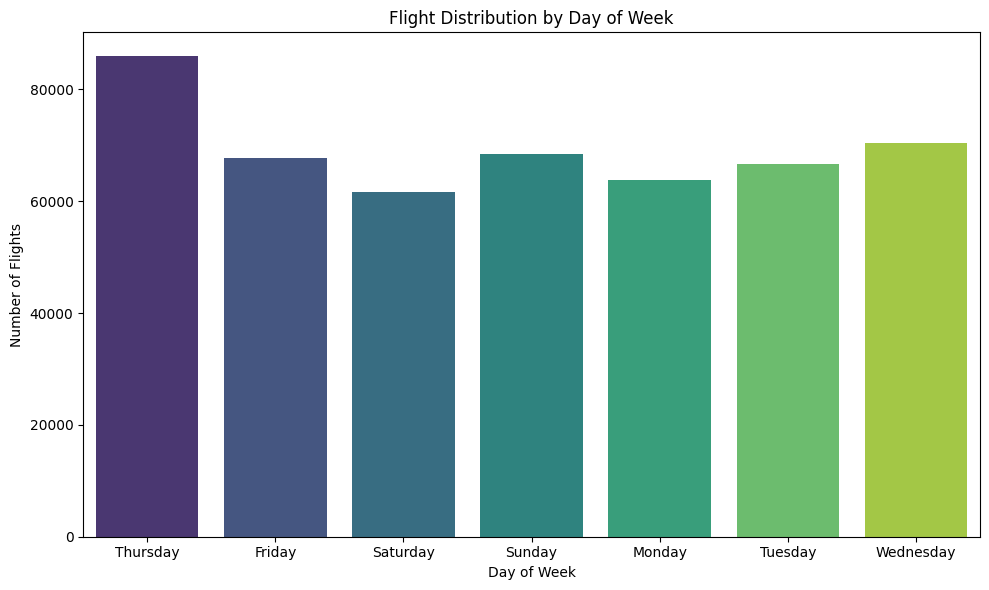

In [0]:
#Count plot to see flight distribution by day of week
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="DayOfWeek",
    palette="viridis"
)
plt.title("Flight Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

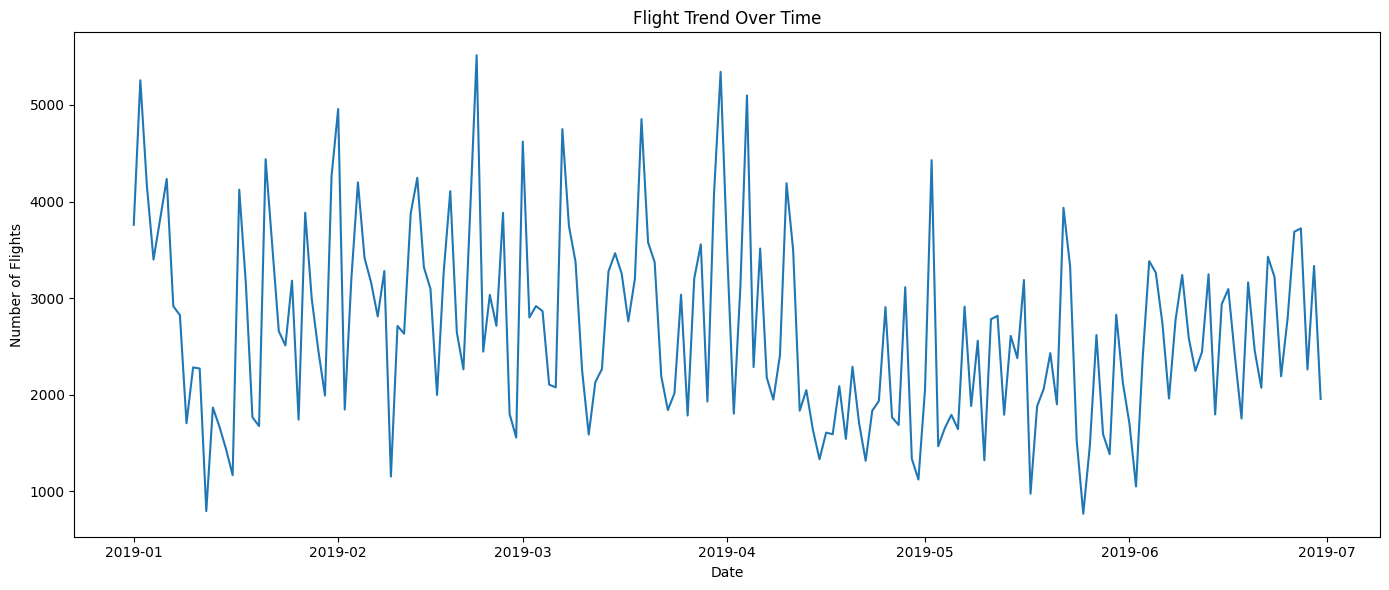

In [0]:

#Trend analysis over time

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and count number of flights per day
daily_counts = df.groupby('Date').size().reset_index(name='FlightCount')

# Plot trend over time
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_counts, x='Date', y='FlightCount')
plt.title("Flight Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-4581891372614314-2299691928:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DepHour', data=df, palette='mako')


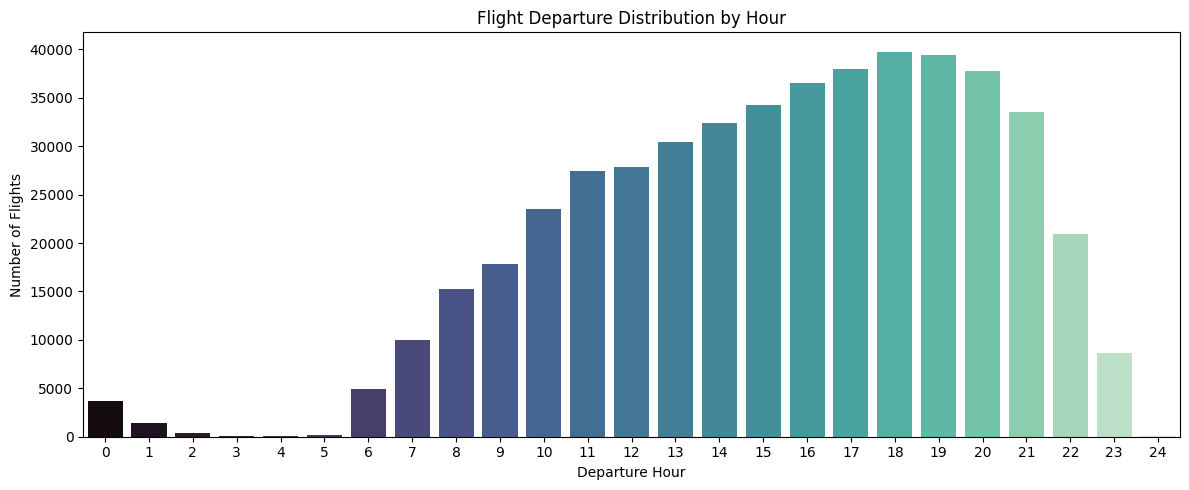

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-4581891372614314-2299691928:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ArrHour', data=df, palette='crest')


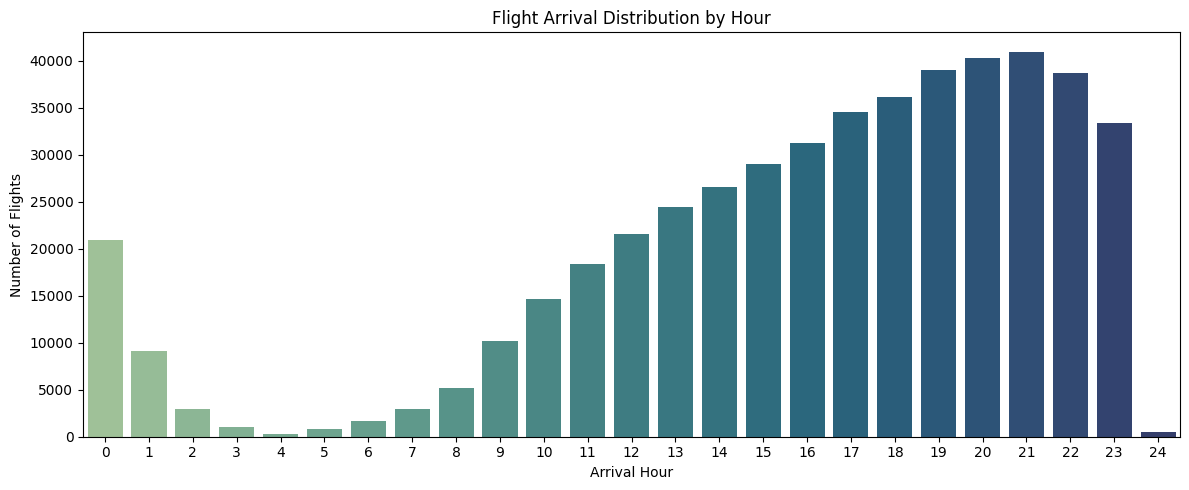

In [0]:
# Distribution & peak time visualization
# Convert 'DepTime' and 'ArrTime' to hour of day (assuming format is HHMM as int or str)
df['DepHour'] = df['DepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]) if not pd.isnull(x) else np.nan)
df['ArrHour'] = df['ArrTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]) if not pd.isnull(x) else np.nan)

# Plot distribution of departures by hour
plt.figure(figsize=(12,5))
sns.countplot(x='DepHour', data=df, palette='mako')
plt.title('Flight Departure Distribution by Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Plot distribution of arrivals by hour
plt.figure(figsize=(12,5))
sns.countplot(x='ArrHour', data=df, palette='crest')
plt.title('Flight Arrival Distribution by Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

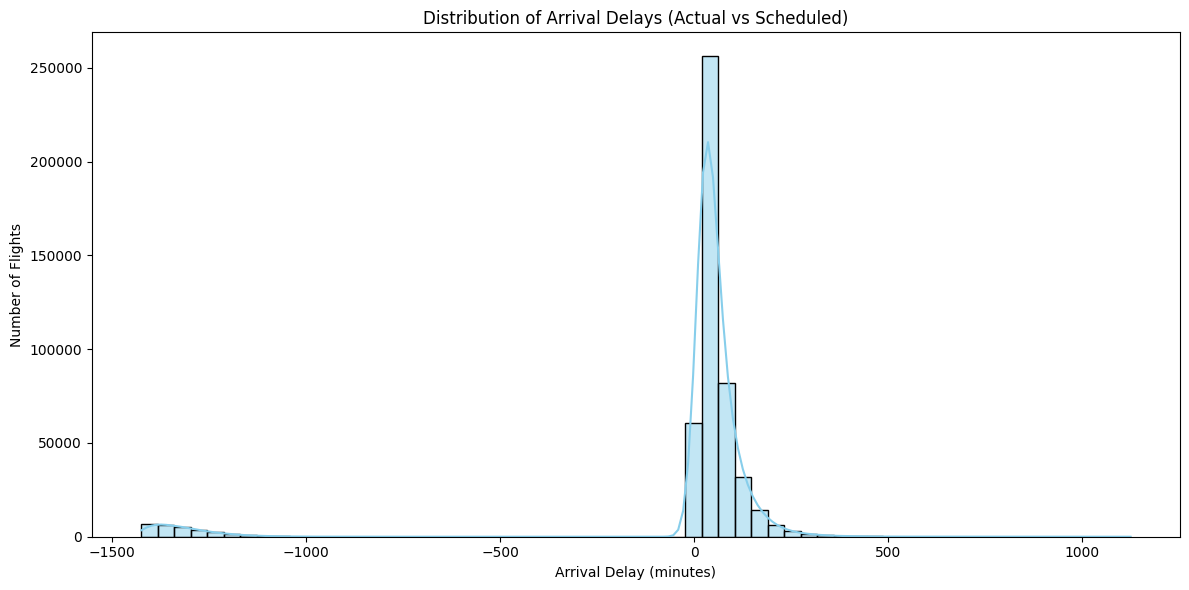

In [0]:
# Compare actual vs scheduled arrival times using 'ArrTime' and 'CRSArrTime'
# Calculate arrival delay in minutes
def time_to_minutes(t):
    if pd.isnull(t):
        return np.nan
    t = str(int(t)).zfill(4)
    return int(t[:2]) * 60 + int(t[2:])

df['ArrMinutes'] = df['ArrTime'].apply(time_to_minutes)
df['CRSArrMinutes'] = df['CRSArrTime'].apply(time_to_minutes)
df['ArrivalDelay'] = df['ArrMinutes'] - df['CRSArrMinutes']

# Plot distribution of arrival delays
plt.figure(figsize=(12,6))
sns.histplot(df['ArrivalDelay'].dropna(), bins=60, kde=True, color='skyblue')
plt.title('Distribution of Arrival Delays (Actual vs Scheduled)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-4581891372614317-3053072481:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airline_counts, x='Airline', y='FlightCount', palette='viridis')


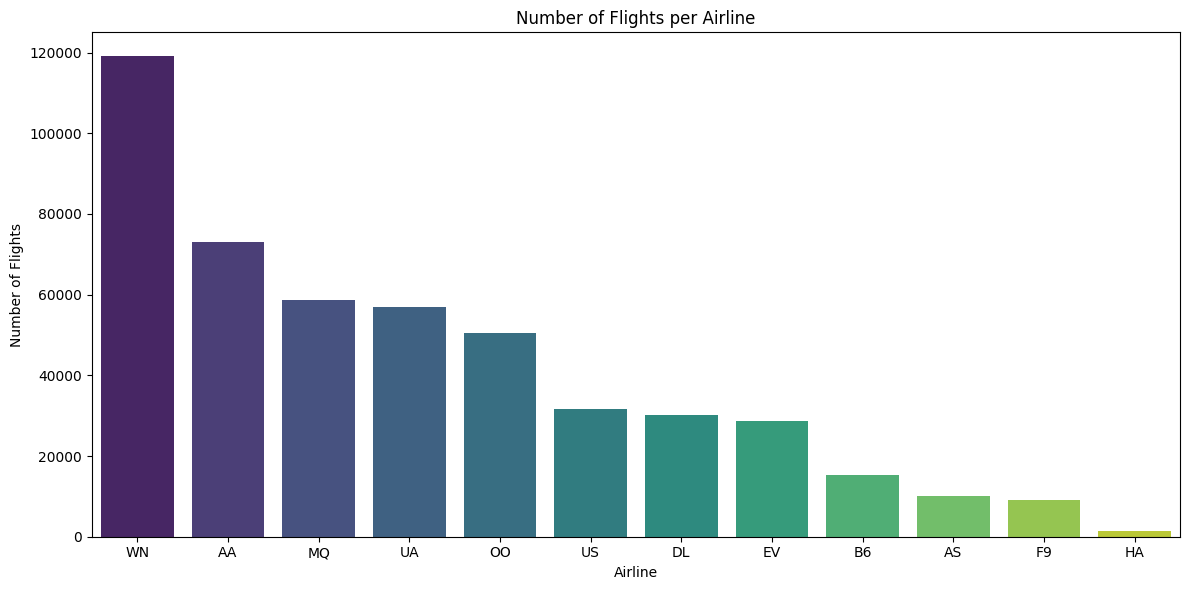

In [0]:
# EDA: Flights per airline

# Count number of flights per airline
airline_counts = df['UniqueCarrier'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'FlightCount']

# Display table of flights per airline


# Plot flights per airline
plt.figure(figsize=(12,6))
sns.barplot(data=airline_counts, x='Airline', y='FlightCount', palette='viridis')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-4581891372614318-2245333052:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_stats, x='Airline', y='MeanDelay', palette='viridis')


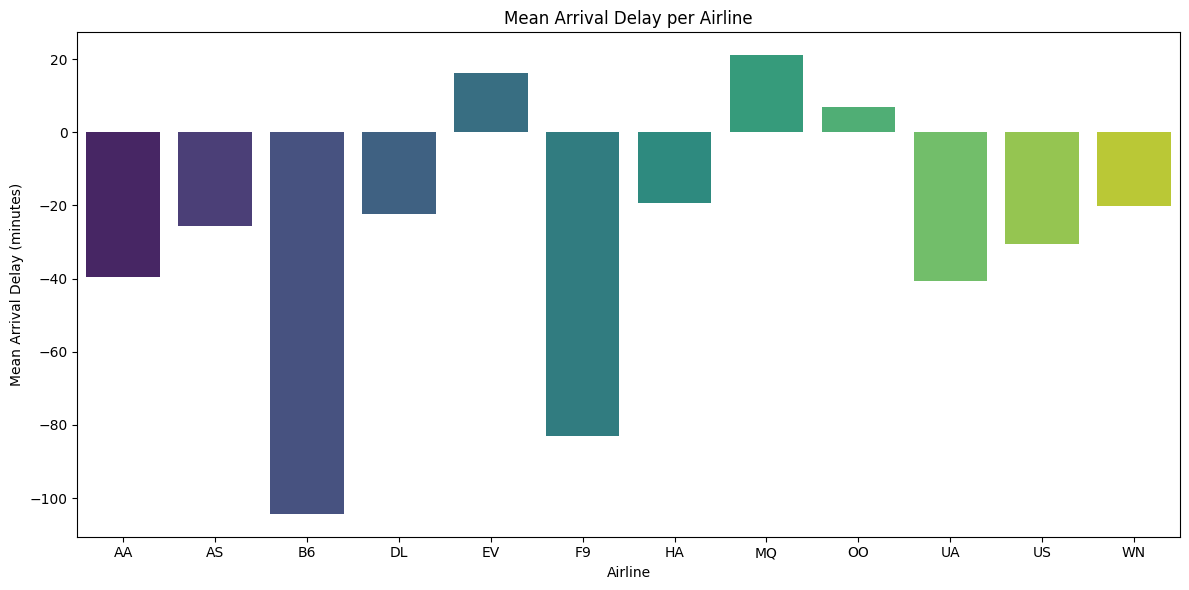

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-4581891372614318-2245333052:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UniqueCarrier', y='ArrivalDelay', palette='mako')


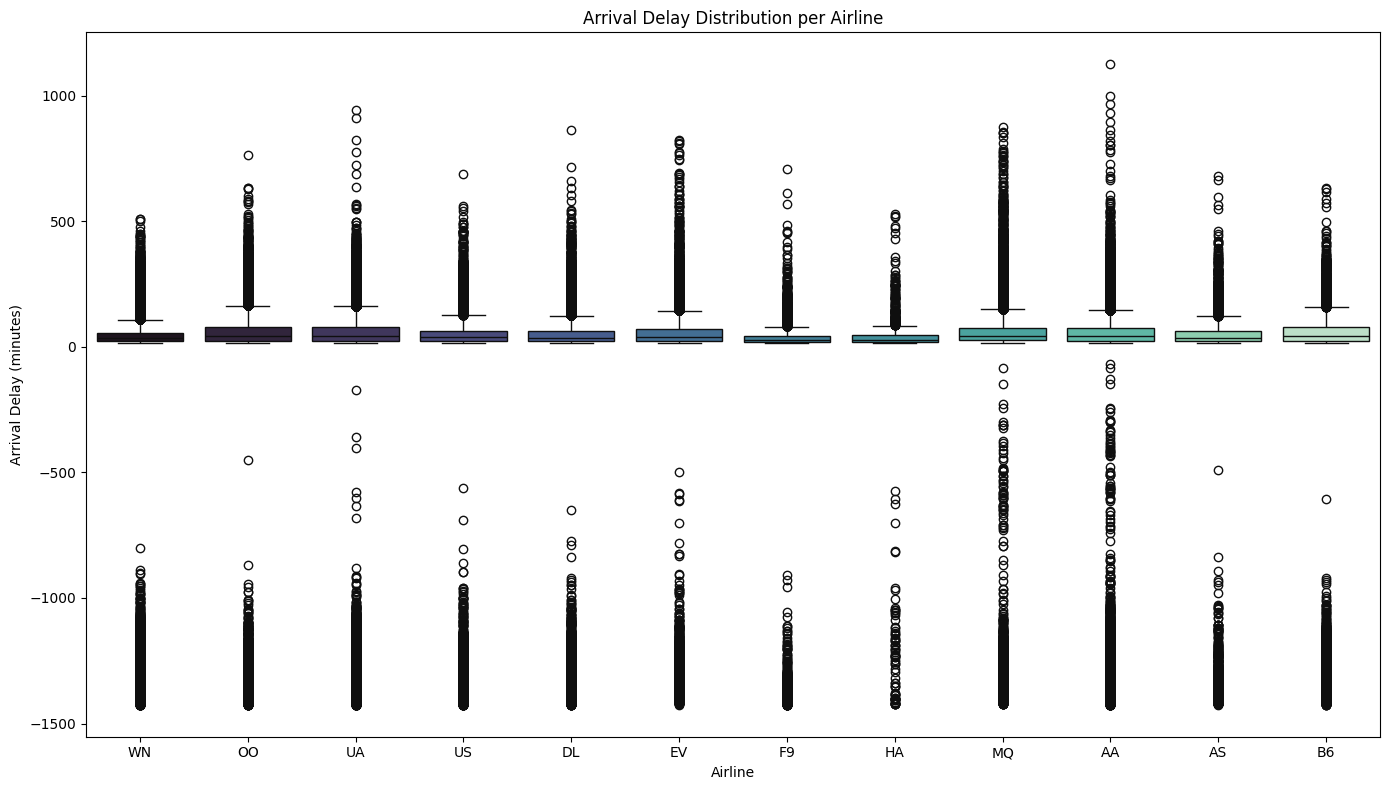

In [0]:
# EDA: Arrival delays per airline

# Calculate mean, median, and std of arrival delays per airline
delay_stats = df.groupby('UniqueCarrier')['ArrivalDelay'].agg(['mean', 'median', 'std', 'count']).reset_index()
delay_stats.columns = ['Airline', 'MeanDelay', 'MedianDelay', 'StdDelay', 'FlightCount']

# Display delay statistics per airline


# Plot mean arrival delay per airline
plt.figure(figsize=(12,6))
sns.barplot(data=delay_stats, x='Airline', y='MeanDelay', palette='viridis')
plt.title('Mean Arrival Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Plot distribution of arrival delays for each airline
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='UniqueCarrier', y='ArrivalDelay', palette='mako')
plt.title('Arrival Delay Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

FlightNum,Count
50,523
39,477
321,454
510,451
44,445


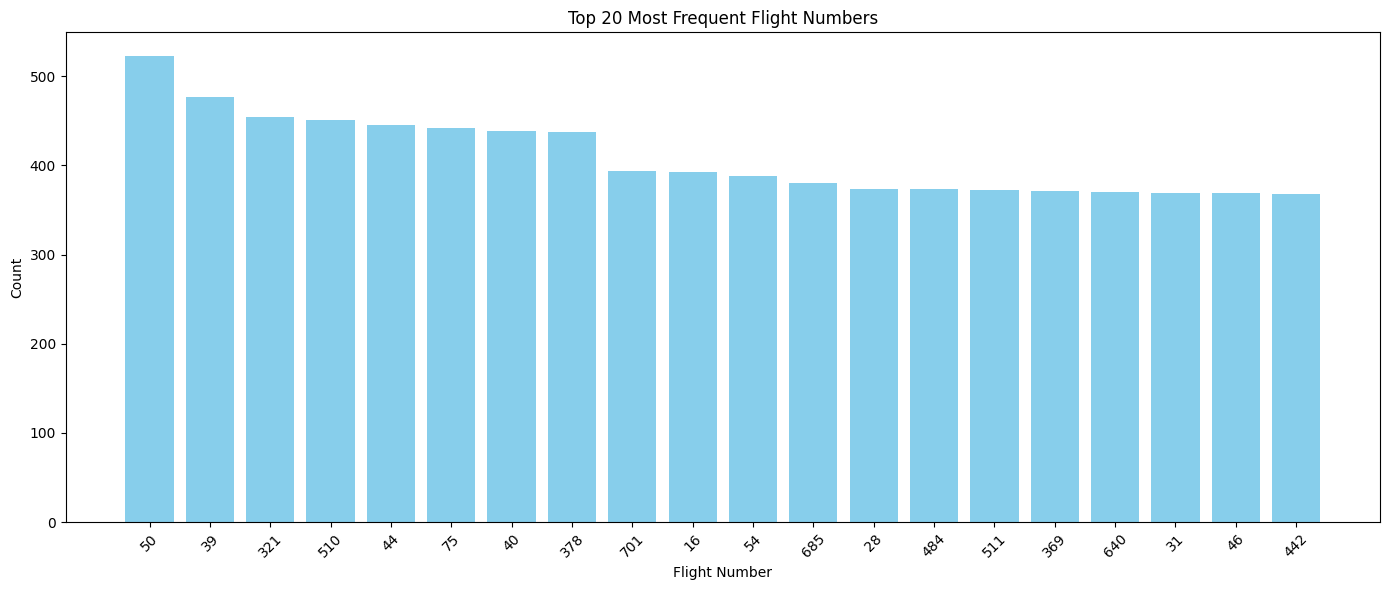

In [0]:
#EDA: Usually ID, less useful for plots

# FlightNum is typically an identifier and not useful for most plots
# Example: Check unique flight numbers and their frequency
flightnum_counts = df['FlightNum'].value_counts().reset_index()
flightnum_counts.columns = ['FlightNum', 'Count']
display(flightnum_counts.head())

# Plot the top 20 most frequent flight numbers using matplotlib
plt.figure(figsize=(14,6))
plt.bar(flightnum_counts['FlightNum'][:20].astype(str), flightnum_counts['Count'][:20], color='skyblue')
plt.title('Top 20 Most Frequent Flight Numbers')
plt.xlabel('Flight Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Avoid using FlightNum in plots unless specifically analyzing flight-level patterns

YearMonth,FlightCount
2019-03,94196
2019-01,87910
2019-02,86969
2019-06,79236
2019-04,68169
2019-05,68071


/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420342-4117196779:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


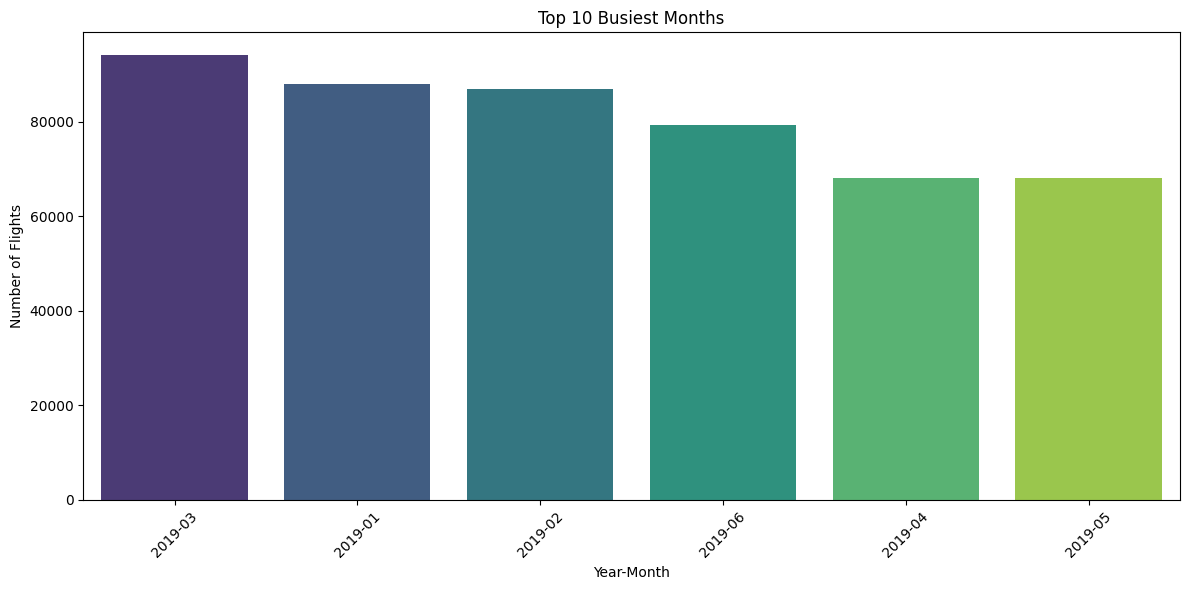

In [0]:
# Extract year and month from 'Date'
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# Count number of flights per month
month_counts = df['YearMonth'].value_counts().reset_index()
month_counts.columns = ['YearMonth', 'FlightCount']
top_months = month_counts.sort_values('FlightCount', ascending=False).head(10)

display(top_months)

# Plot top 10 busiest months
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_months,
    x='YearMonth',
    y='FlightCount',
    palette='viridis'
)
plt.title('Top 10 Busiest Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Origin,Dest,FlightCount
ORD,LGA,1920
LGA,ORD,1615
LAX,SFO,1603
SFO,LAX,1457
LAS,LAX,1305
HOU,DAL,1276
DAL,HOU,1200
ORD,LAX,1154
PHX,LAS,1152
DFW,ORD,1125


/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614320-3029999425:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


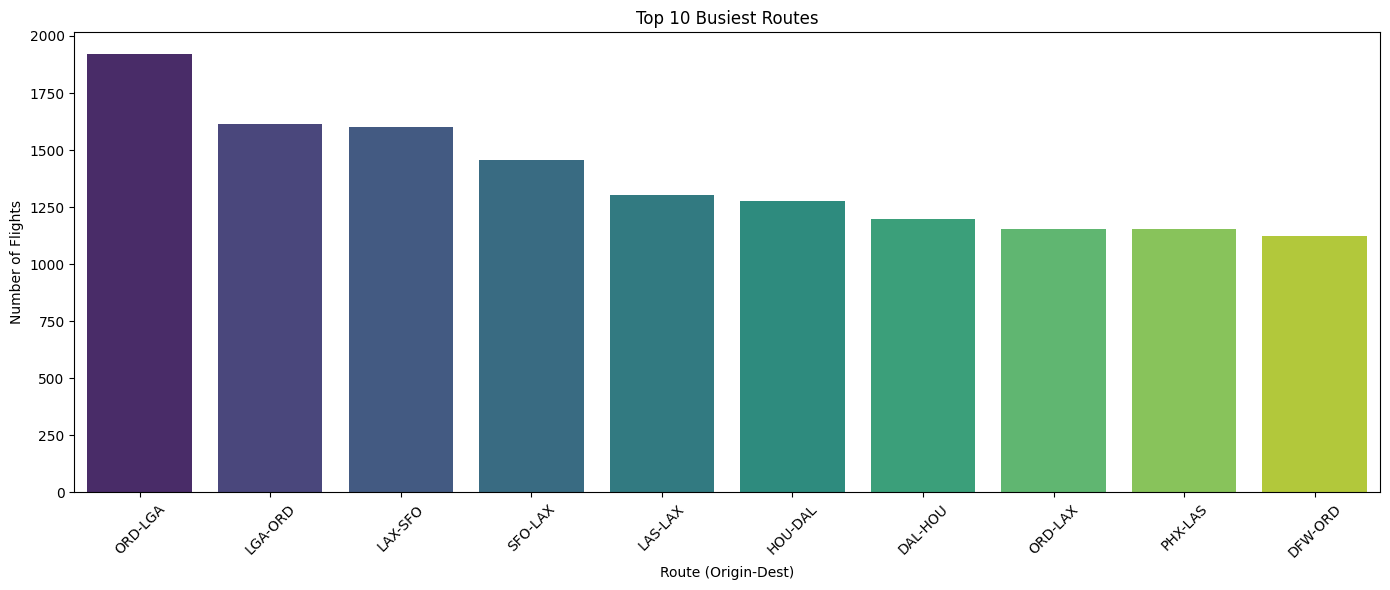

Airport,Departures
ORD,46945
DFW,33027
ATL,28834
DEN,23543
LAX,17194
LAS,15529
SFO,14825
PHX,13873
MDW,9318
MCO,9043


/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614320-3029999425:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


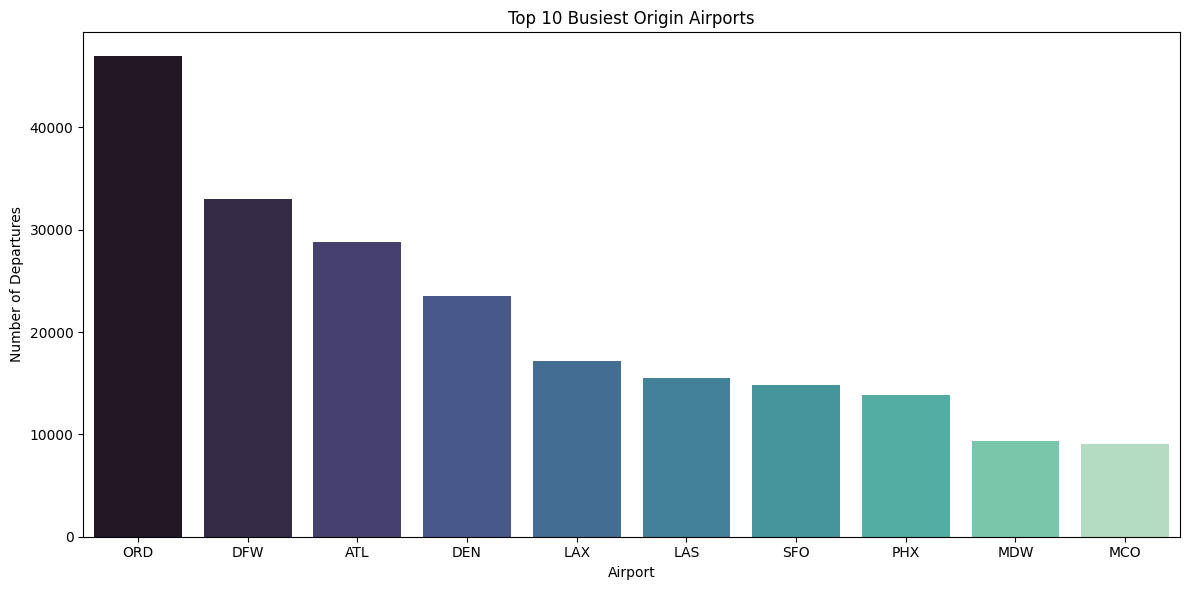

Airport,Arrivals
ORD,40622
DFW,24543
ATL,23557
DEN,19250
LAX,18350
SFO,15721
LAS,14930
PHX,12517
LGA,10692
SLC,9104


/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614320-3029999425:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


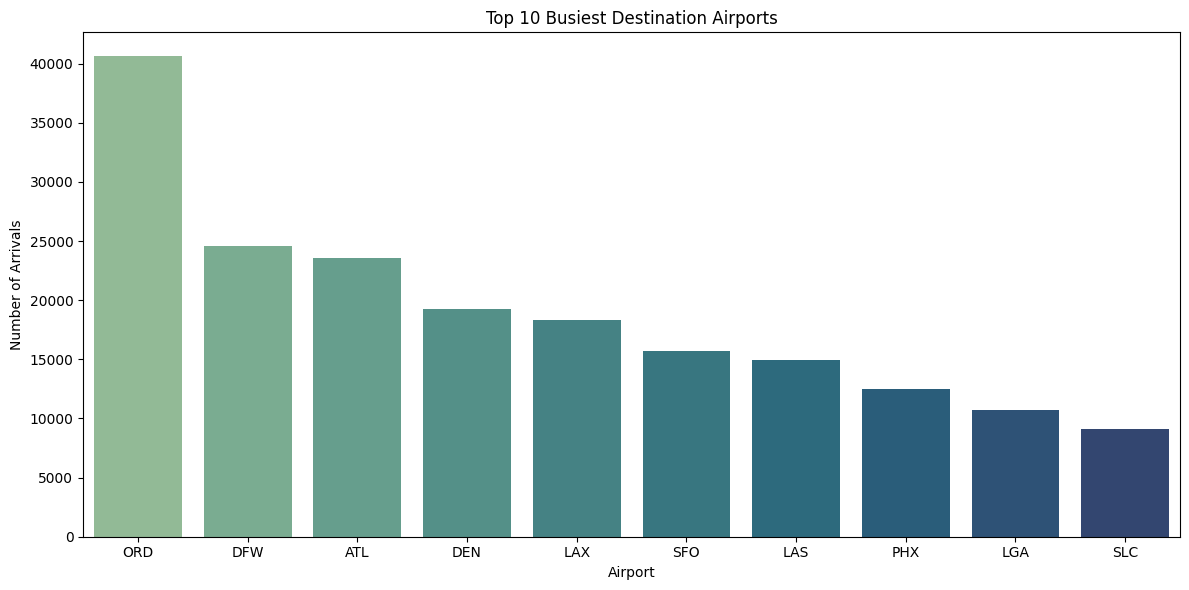

In [0]:
# Top 10 busiest routes (Origin-Dest pairs)
route_counts = df.groupby(['Origin', 'Dest']).size().reset_index(name='FlightCount')
top_routes = route_counts.sort_values('FlightCount', ascending=False).head(10)
display(top_routes)

plt.figure(figsize=(14,6))
sns.barplot(
    data=top_routes,
    x=top_routes['Origin'] + '-' + top_routes['Dest'],
    y='FlightCount',
    palette='viridis'
)
plt.title('Top 10 Busiest Routes')
plt.xlabel('Route (Origin-Dest)')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Airport analysis: Top 10 busiest origin airports
origin_counts = df['Origin'].value_counts().reset_index()
origin_counts.columns = ['Airport', 'Departures']
display(origin_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(
    data=origin_counts.head(10),
    x='Airport',
    y='Departures',
    palette='mako'
)
plt.title('Top 10 Busiest Origin Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Departures')
plt.tight_layout()
plt.show()

# Airport analysis: Top 10 busiest destination airports
dest_counts = df['Dest'].value_counts().reset_index()
dest_counts.columns = ['Airport', 'Arrivals']
display(dest_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(
    data=dest_counts.head(10),
    x='Airport',
    y='Arrivals',
    palette='crest'
)
plt.title('Top 10 Busiest Destination Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Arrivals')
plt.tight_layout()
plt.show()

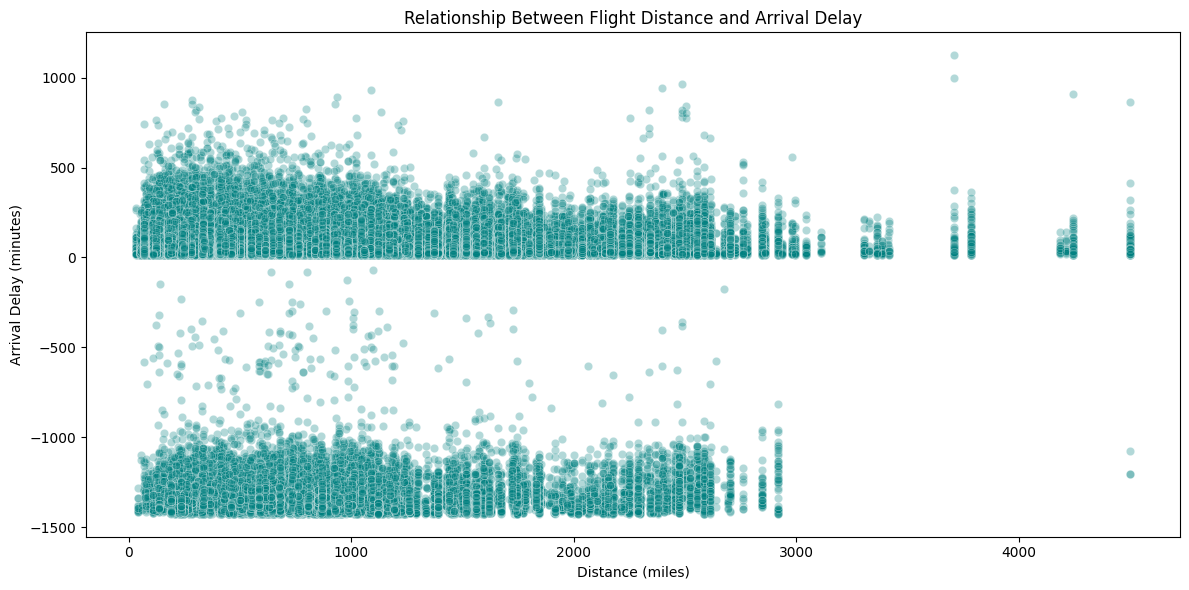

Correlation between Distance and Arrival Delay: -0.07


/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614321-2569998928:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_delay = df.groupby('DistanceBin')['ArrivalDelay'].mean().reset_index()
/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614321-2569998928:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


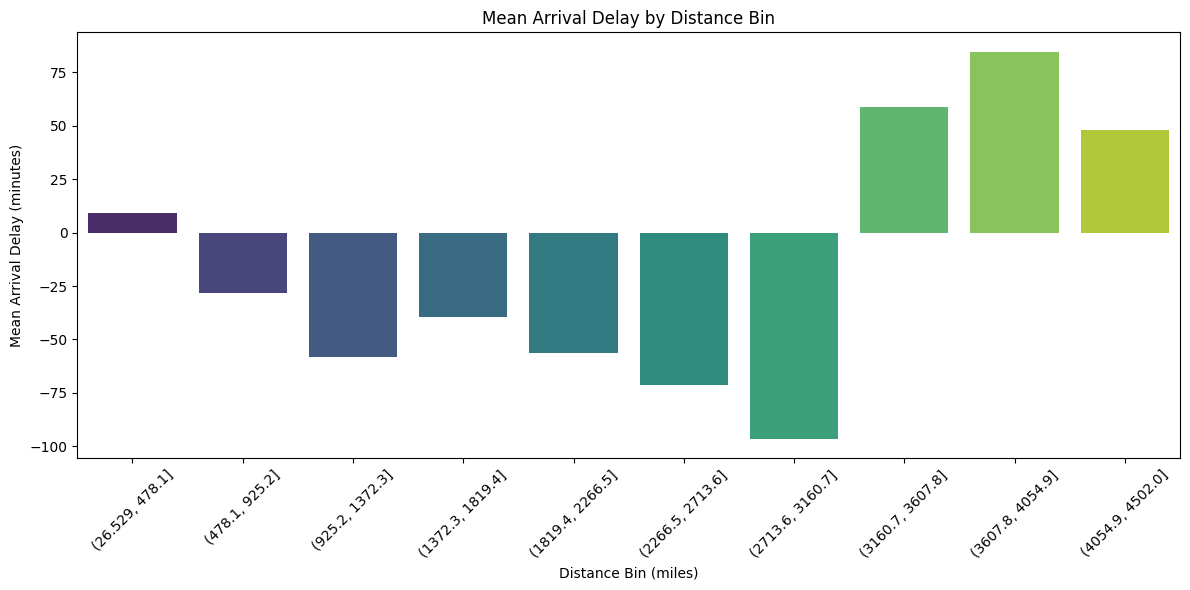

In [0]:
# EDA: Relationship between distance and arrival delay

# Scatter plot: Distance vs Arrival Delay
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Distance',
    y='ArrivalDelay',
    alpha=0.3,
    color='teal'
)
plt.title('Relationship Between Flight Distance and Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Calculate correlation between distance and arrival delay
corr = df[['Distance', 'ArrivalDelay']].corr().loc['Distance', 'ArrivalDelay']
print(f"Correlation between Distance and Arrival Delay: {corr:.2f}")

# Plot mean arrival delay by distance bins
df['DistanceBin'] = pd.cut(df['Distance'], bins=10)
distance_delay = df.groupby('DistanceBin')['ArrivalDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=distance_delay,
    x='DistanceBin',
    y='ArrivalDelay',
    palette='viridis'
)
plt.title('Mean Arrival Delay by Distance Bin')
plt.xlabel('Distance Bin (miles)')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420351-390837838:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


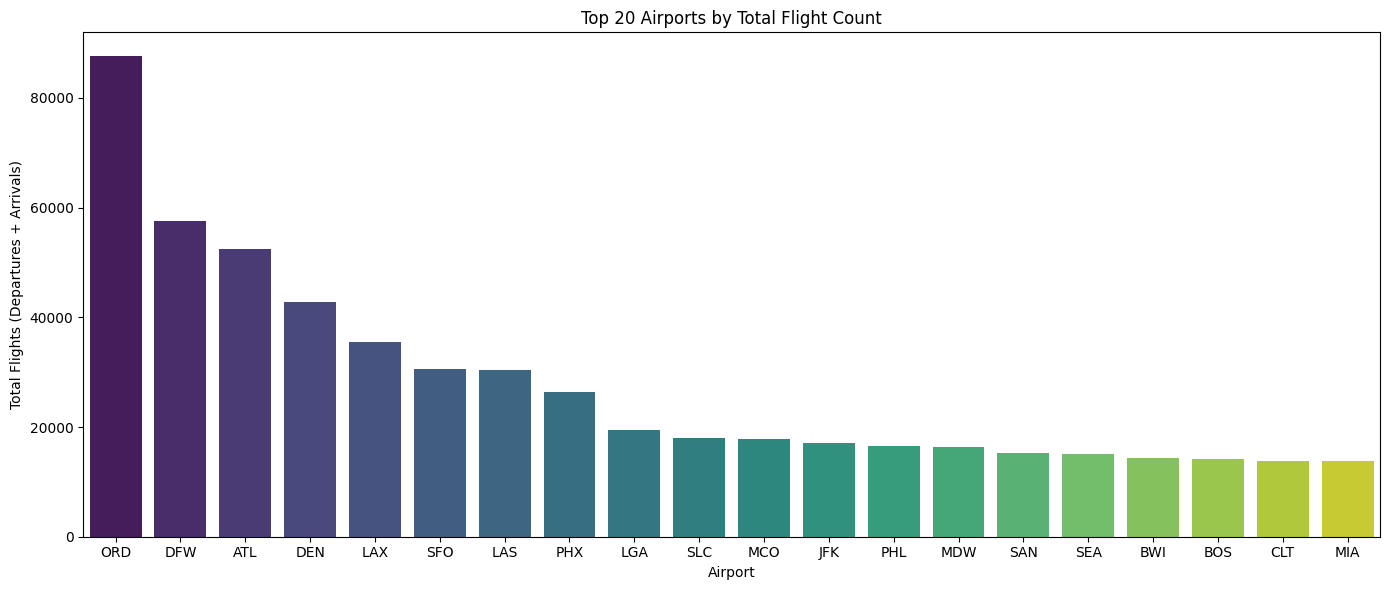

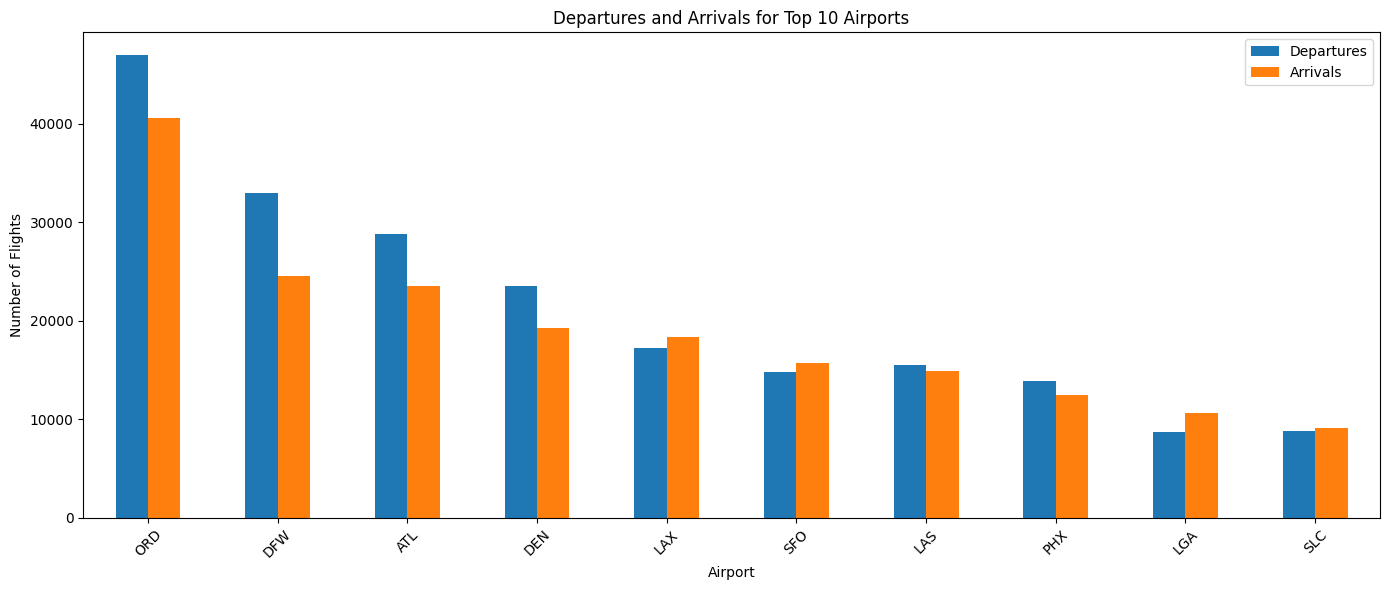

In [0]:
# Flight distribution by airport: Departures and Arrivals

# Count departures per airport
departures = df['Origin'].value_counts().reset_index()
departures.columns = ['Airport', 'Departures']

# Count arrivals per airport
arrivals = df['Dest'].value_counts().reset_index()
arrivals.columns = ['Airport', 'Arrivals']

# Merge departures and arrivals for combined view
airport_flights = pd.merge(departures, arrivals, on='Airport', how='outer').fillna(0)
airport_flights['TotalFlights'] = airport_flights['Departures'] + airport_flights['Arrivals']
airport_flights = airport_flights.sort_values('TotalFlights', ascending=False)



# Plot top 20 airports by total flights
plt.figure(figsize=(14,6))
sns.barplot(
    data=airport_flights.head(20),
    x='Airport',
    y='TotalFlights',
    palette='viridis'
)
plt.title('Top 20 Airports by Total Flight Count')
plt.xlabel('Airport')
plt.ylabel('Total Flights (Departures + Arrivals)')
plt.tight_layout()
plt.show()

# Side-by-side departures and arrivals for top 10 airports
top10 = airport_flights.head(10).set_index('Airport')[['Departures', 'Arrivals']]
top10.plot(kind='bar', figsize=(14,6), color=['#1f77b4', '#ff7f0e'])
plt.title('Departures and Arrivals for Top 10 Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

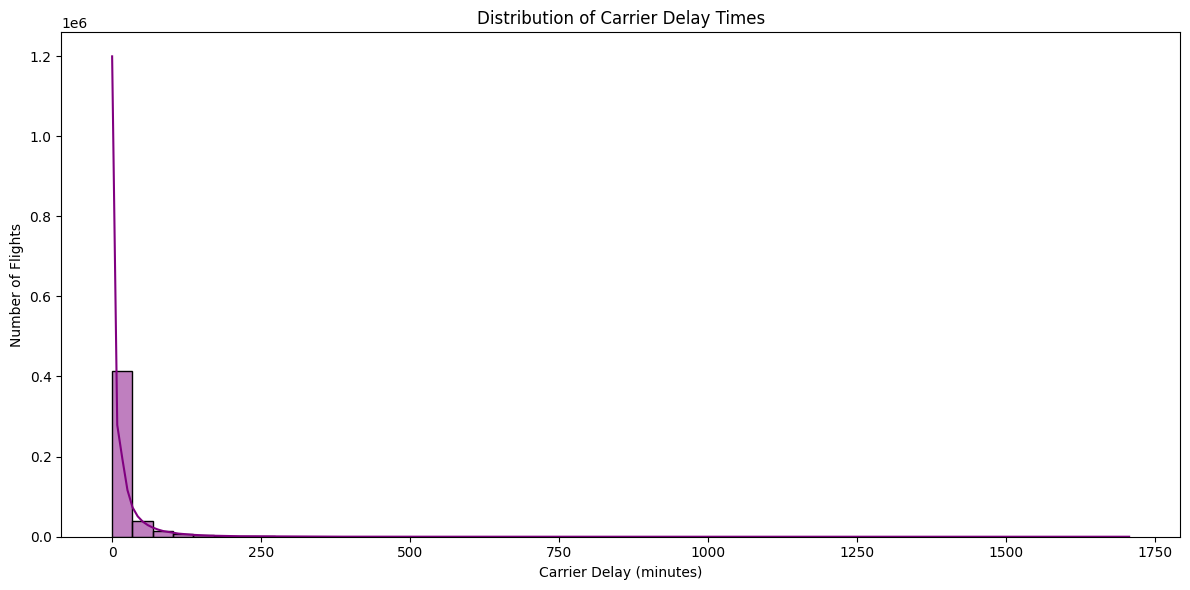

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420352-2124934494:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UniqueCarrier', y='CarrierDelay', palette='mako')


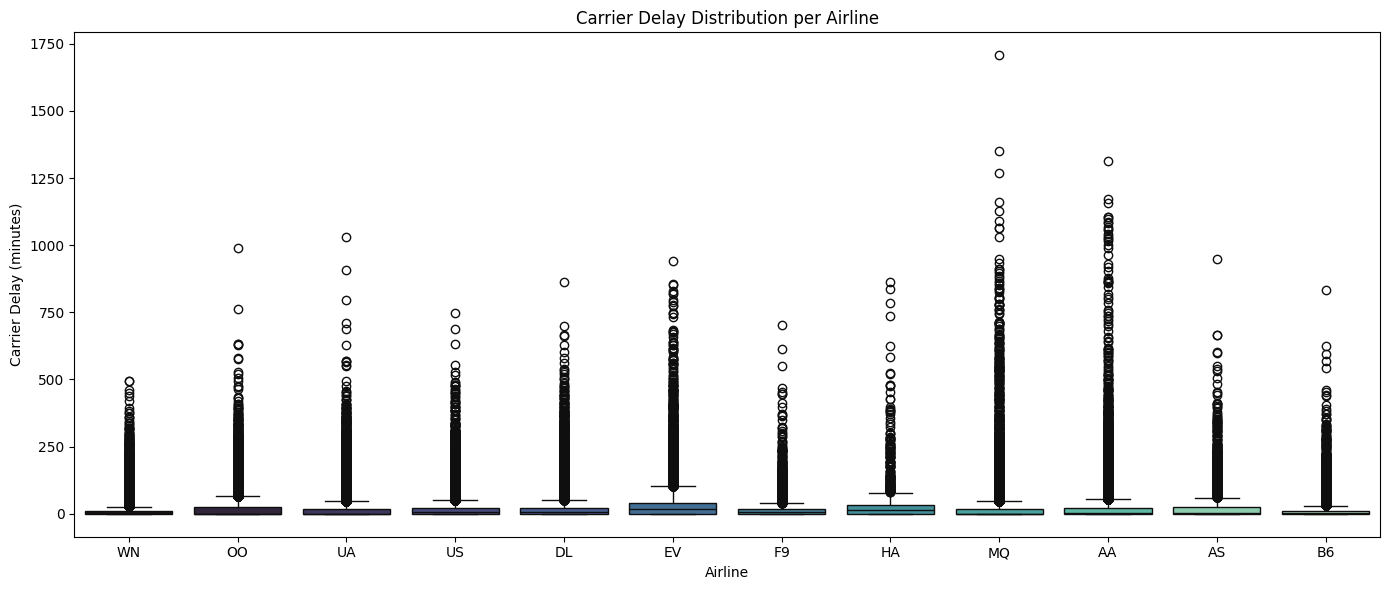

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420352-2124934494:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_carrier_delay, x='Airline', y='MeanCarrierDelay', palette='viridis')


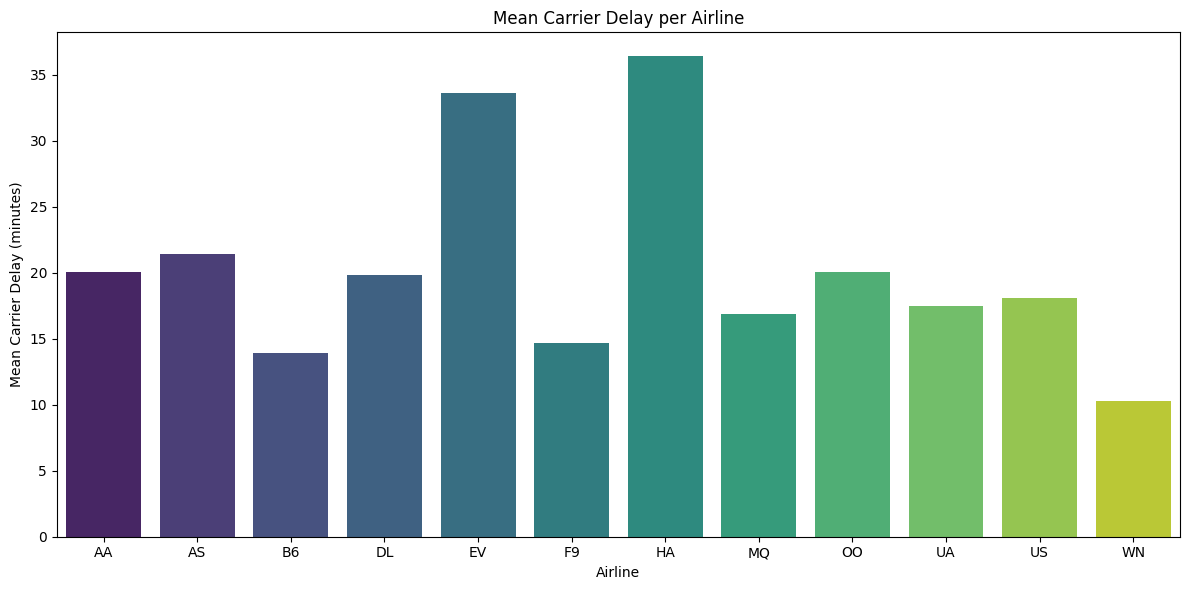

In [0]:
# Visual exploration of Carrier Delays

# Plot distribution of CarrierDelay times
plt.figure(figsize=(12,6))
sns.histplot(df['CarrierDelay'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Carrier Delay Times')
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Boxplot of CarrierDelay per airline
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='UniqueCarrier', y='CarrierDelay', palette='mako')
plt.title('Carrier Delay Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Carrier Delay (minutes)')
plt.tight_layout()
plt.show()

# Mean carrier delay per airline
mean_carrier_delay = df.groupby('UniqueCarrier')['CarrierDelay'].mean().reset_index()
mean_carrier_delay.columns = ['Airline', 'MeanCarrierDelay']


plt.figure(figsize=(12,6))
sns.barplot(data=mean_carrier_delay, x='Airline', y='MeanCarrierDelay', palette='viridis')
plt.title('Mean Carrier Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Carrier Delay (minutes)')
plt.tight_layout()
plt.show()

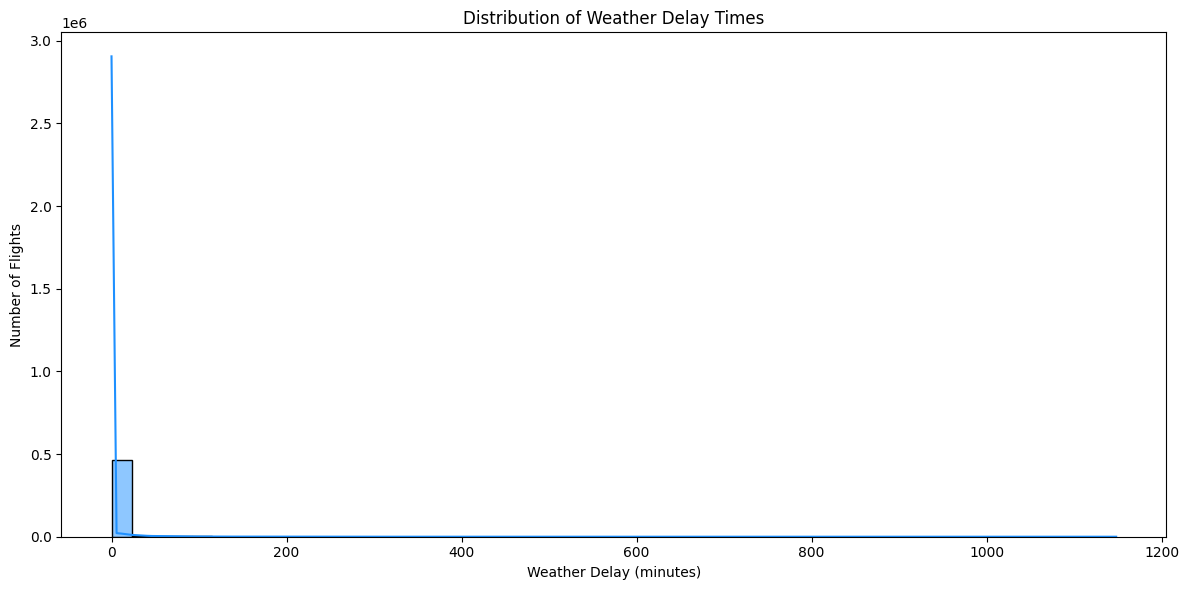

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420353-3327320923:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UniqueCarrier', y='WeatherDelay', palette='crest')


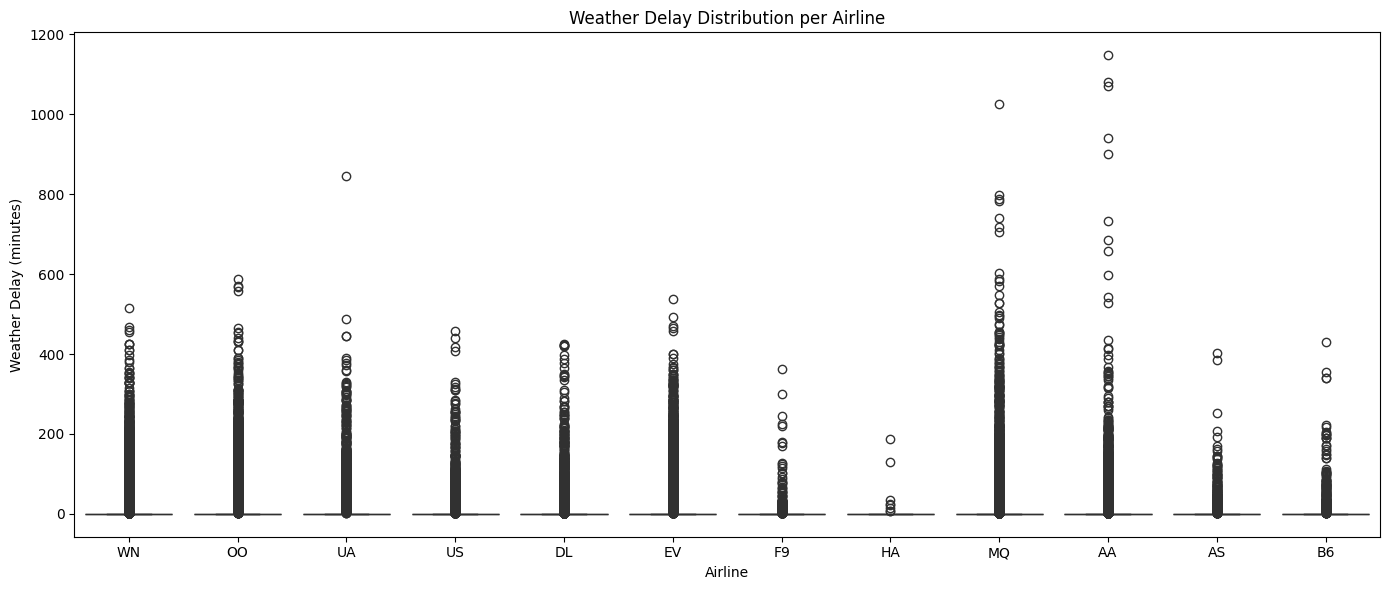

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420353-3327320923:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_weather_delay, x='Airline', y='MeanWeatherDelay', palette='viridis')


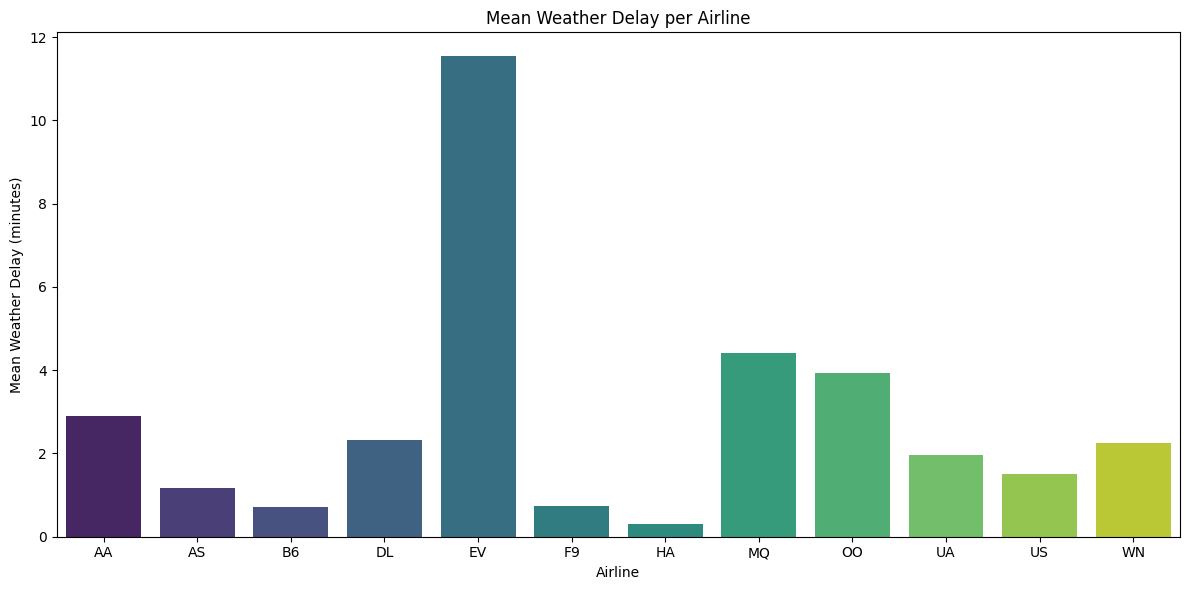

In [0]:
# Visual exploration of Weather Delays

# Plot distribution of WeatherDelay times
plt.figure(figsize=(12,6))
sns.histplot(df['WeatherDelay'].dropna(), bins=50, kde=True, color='dodgerblue')
plt.title('Distribution of Weather Delay Times')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Boxplot of WeatherDelay per airline
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='UniqueCarrier', y='WeatherDelay', palette='crest')
plt.title('Weather Delay Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Weather Delay (minutes)')
plt.tight_layout()
plt.show()

# Mean weather delay per airline
mean_weather_delay = df.groupby('UniqueCarrier')['WeatherDelay'].mean().reset_index()
mean_weather_delay.columns = ['Airline', 'MeanWeatherDelay']

plt.figure(figsize=(12,6))
sns.barplot(data=mean_weather_delay, x='Airline', y='MeanWeatherDelay', palette='viridis')
plt.title('Mean Weather Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Weather Delay (minutes)')
plt.tight_layout()
plt.show()

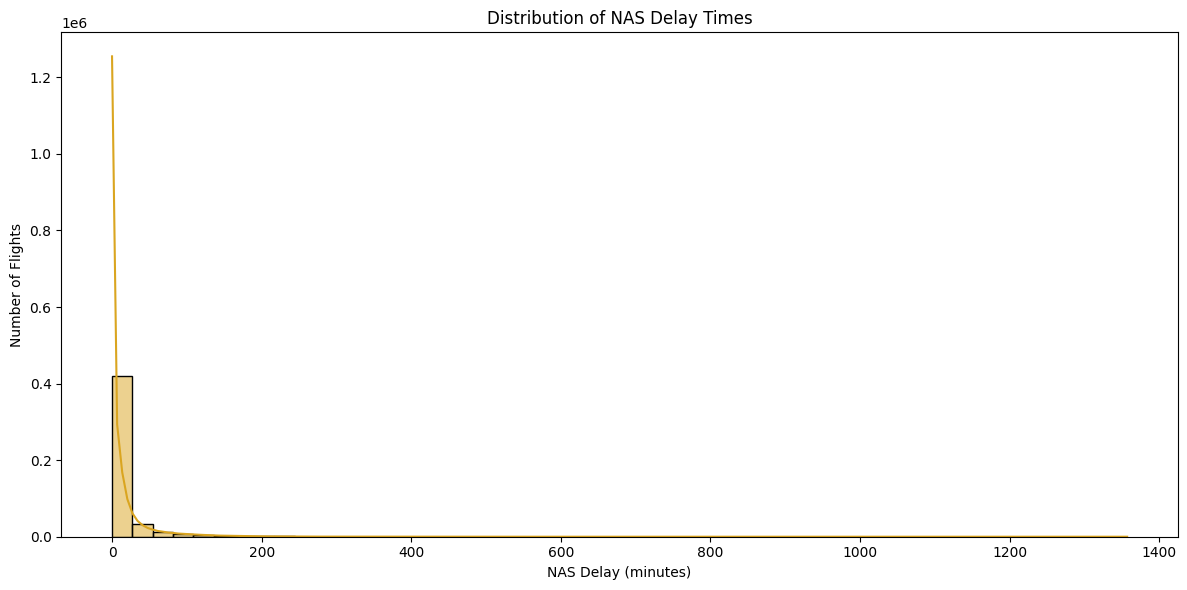

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420354-3853345048:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UniqueCarrier', y='NASDelay', palette='crest')


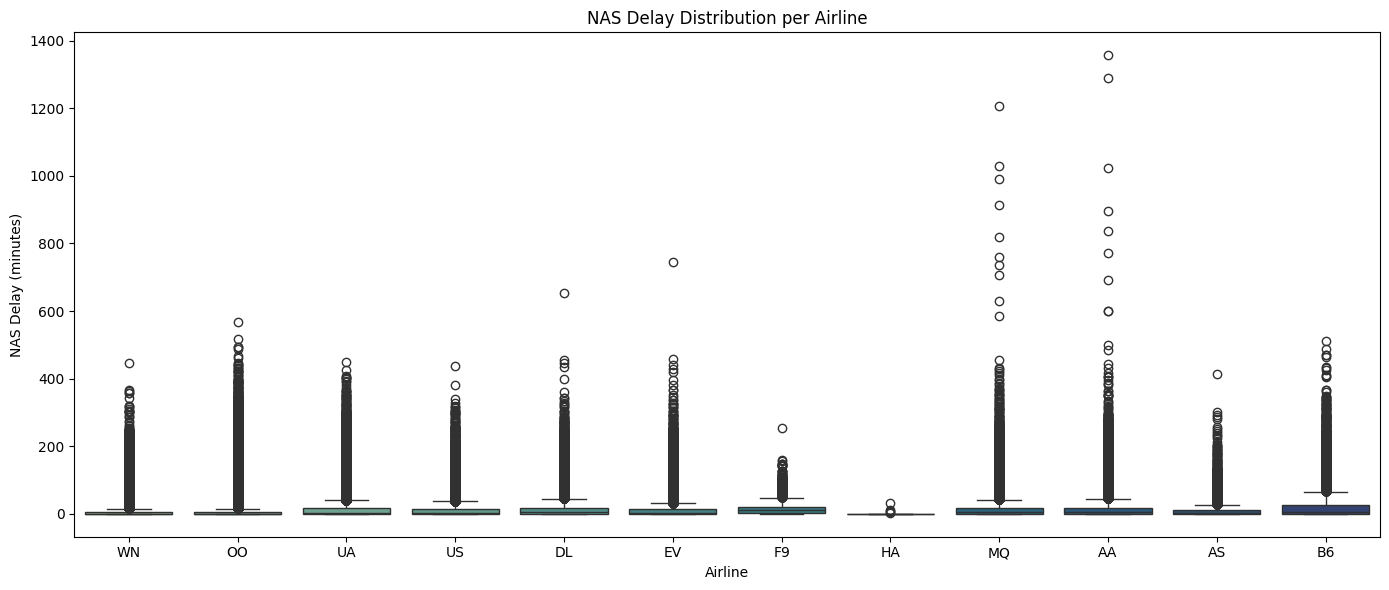

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420354-3853345048:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_nas_delay, x='Airline', y='MeanNASDelay', palette='viridis')


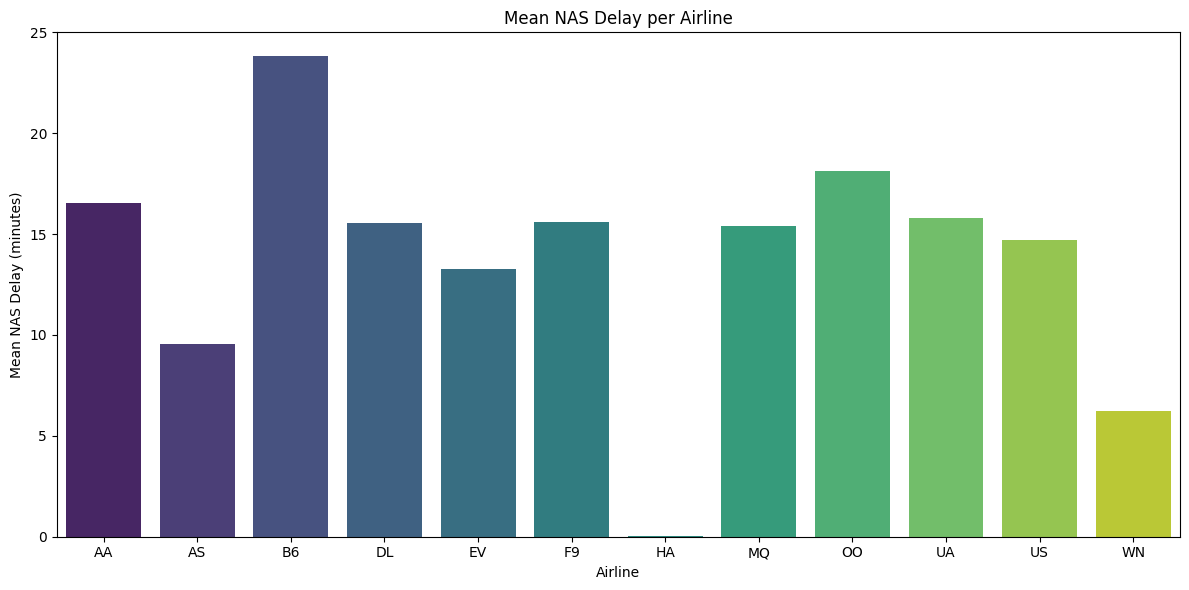

In [0]:
# Visual exploration of NAS Delays

# Plot distribution of NASDelay times
plt.figure(figsize=(12,6))
sns.histplot(df['NASDelay'].dropna(), bins=50, kde=True, color='goldenrod')
plt.title('Distribution of NAS Delay Times')
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Boxplot of NASDelay per airline
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='UniqueCarrier', y='NASDelay', palette='crest')
plt.title('NAS Delay Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('NAS Delay (minutes)')
plt.tight_layout()
plt.show()

# Mean NAS delay per airline
mean_nas_delay = df.groupby('UniqueCarrier')['NASDelay'].mean().reset_index()
mean_nas_delay.columns = ['Airline', 'MeanNASDelay']

plt.figure(figsize=(12,6))
sns.barplot(data=mean_nas_delay, x='Airline', y='MeanNASDelay', palette='viridis')
plt.title('Mean NAS Delay per Airline')
plt.xlabel('Airline')
plt.ylabel('Mean NAS Delay (minutes)')
plt.tight_layout()
plt.show()

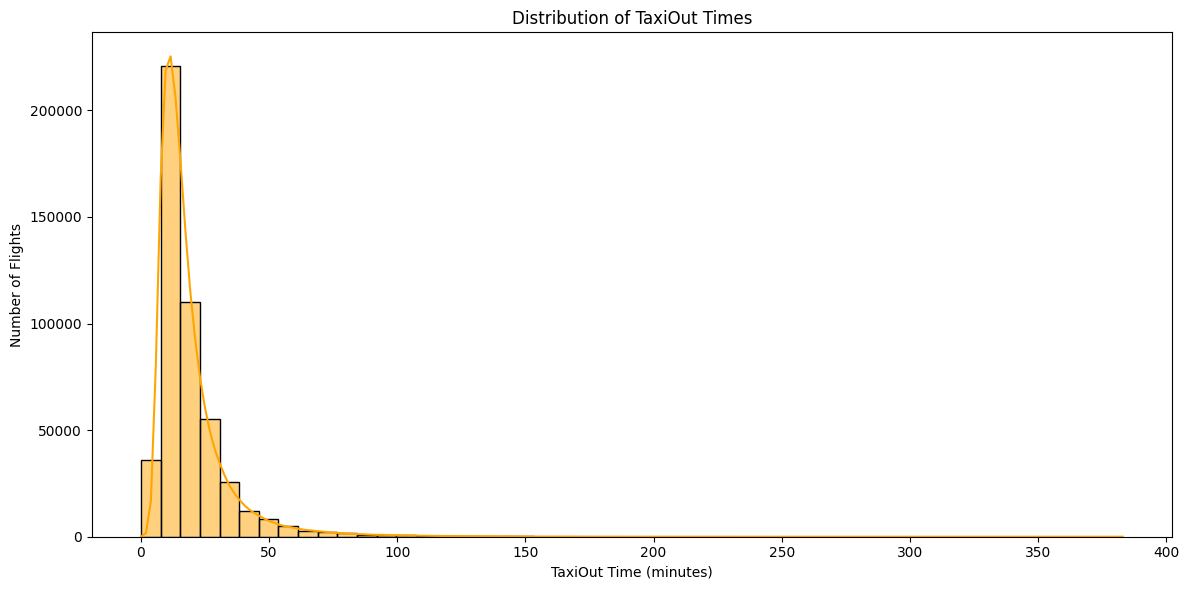

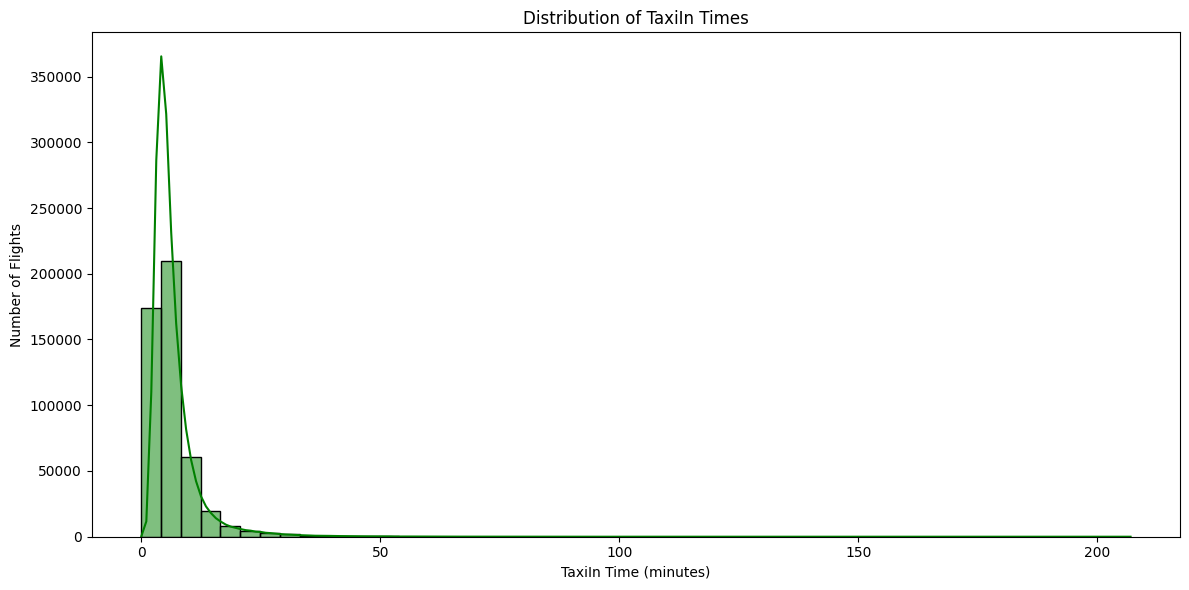

In [0]:
# EDA: Taxi delays (TaxiOut and TaxiIn)

# Plot distribution of TaxiOut times
plt.figure(figsize=(12,6))
sns.histplot(df['TaxiOut'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of TaxiOut Times')
plt.xlabel('TaxiOut Time (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Plot distribution of TaxiIn times
plt.figure(figsize=(12,6))
sns.histplot(df['TaxiIn'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of TaxiIn Times')
plt.xlabel('TaxiIn Time (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

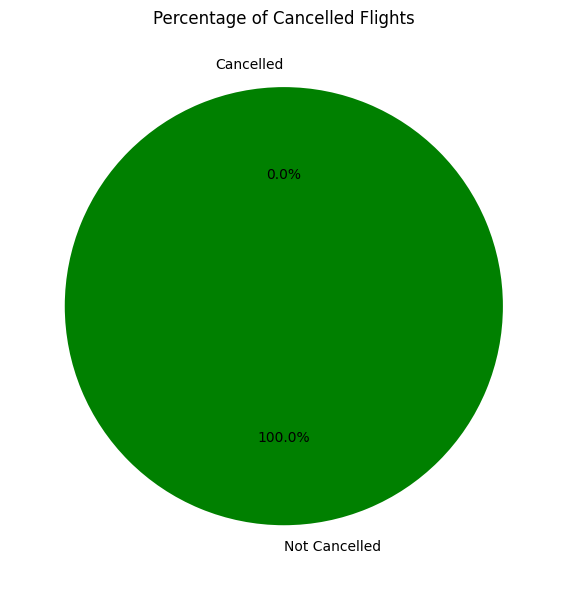

In [0]:
# Calculate percentage of cancelled flights
cancelled_count = df['Cancelled'].sum()
total_flights = len(df)
cancelled_percent = (cancelled_count / total_flights) * 100

# Plot percentage of cancelled vs non-cancelled flights
plt.figure(figsize=(6,6))
plt.pie(
    [cancelled_count, total_flights - cancelled_count],
    labels=['Cancelled', 'Not Cancelled'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=90
)
plt.title('Percentage of Cancelled Flights')
plt.tight_layout()
plt.show()

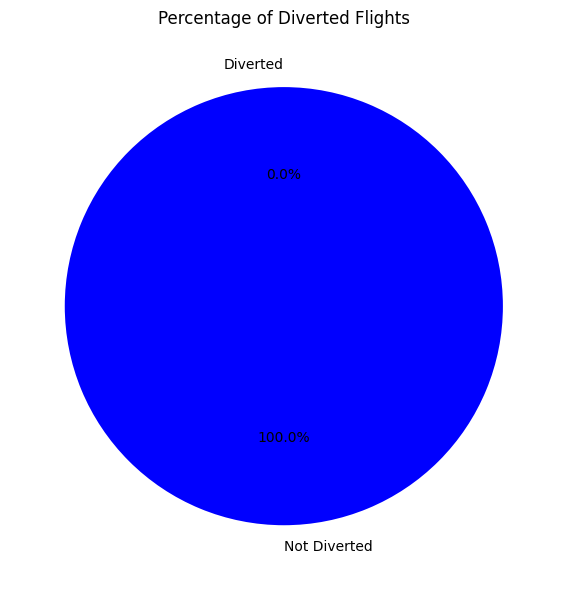

In [0]:
# Calculate percentage of diverted flights
diverted_count = df['Diverted'].sum()
total_flights = len(df)
diverted_percent = (diverted_count / total_flights) * 100

# Plot percentage of diverted vs non-diverted flights
plt.figure(figsize=(6,6))
plt.pie(
    [diverted_count, total_flights - diverted_count],
    labels=['Diverted', 'Not Diverted'],
    autopct='%1.1f%%',
    colors=['orange', 'blue'],
    startangle=90
)
plt.title('Percentage of Diverted Flights')
plt.tight_layout()
plt.show()

/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614326-1181920328:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_delays, x='DelayCause', y='TotalMinutes', palette='mako')


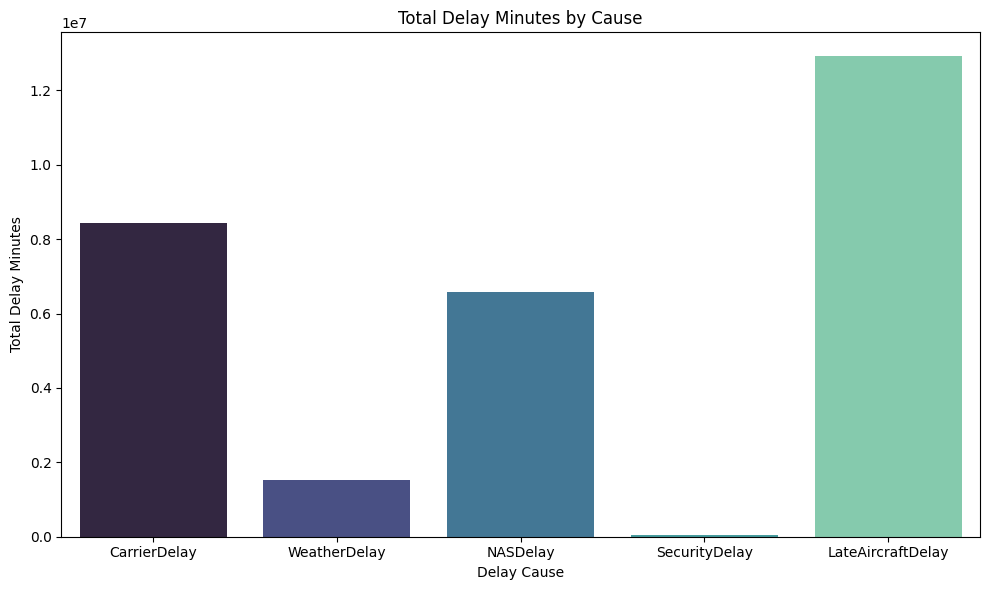

In [0]:
# Delay cause analysis: Plot distribution of delay causes

# Select relevant delay columns
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_cause_df = df[delay_cols].fillna(0)

# Sum total delay minutes for each cause
total_delays = delay_cause_df.sum().reset_index()
total_delays.columns = ['DelayCause', 'TotalMinutes']

# Plot total delay minutes by cause
plt.figure(figsize=(10,6))
sns.barplot(data=total_delays, x='DelayCause', y='TotalMinutes', palette='mako')
plt.title('Total Delay Minutes by Cause')
plt.xlabel('Delay Cause')
plt.ylabel('Total Delay Minutes')
plt.tight_layout()
plt.show()

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420355-2522460969:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dep_hour_delay, x='DepHour', y='MeanArrivalDelay', palette='viridis')


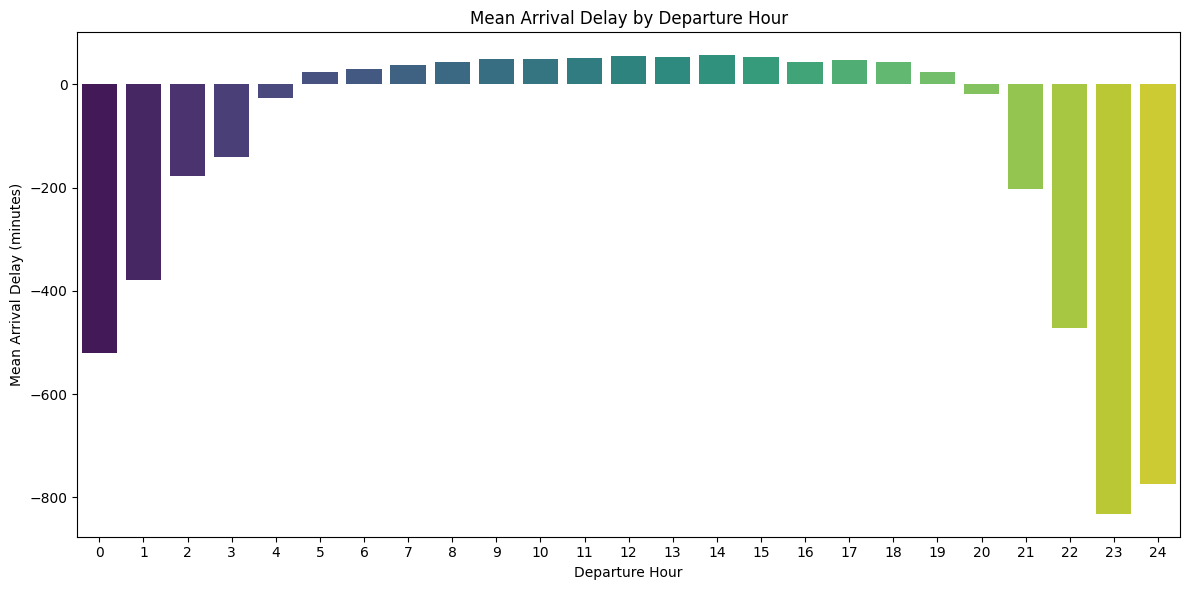

/home/spark-39cdd0e5-eeae-476f-9c05-e5/.ipykernel/2630/command-8177651536420355-2522460969:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arr_hour_delay, x='ArrHour', y='MeanArrivalDelay', palette='mako')


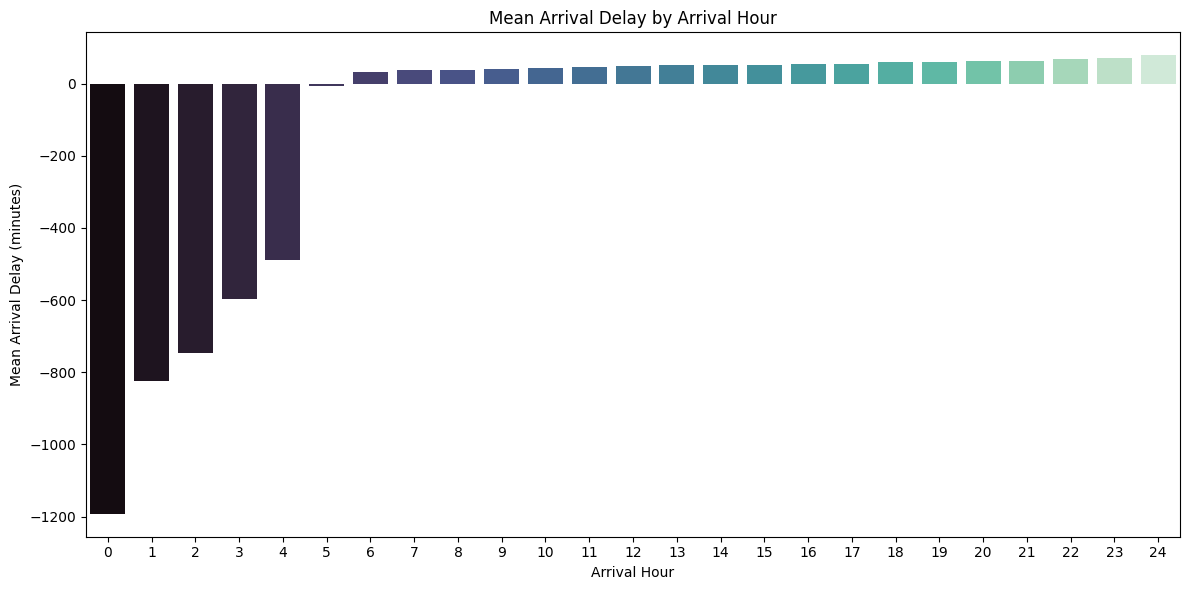

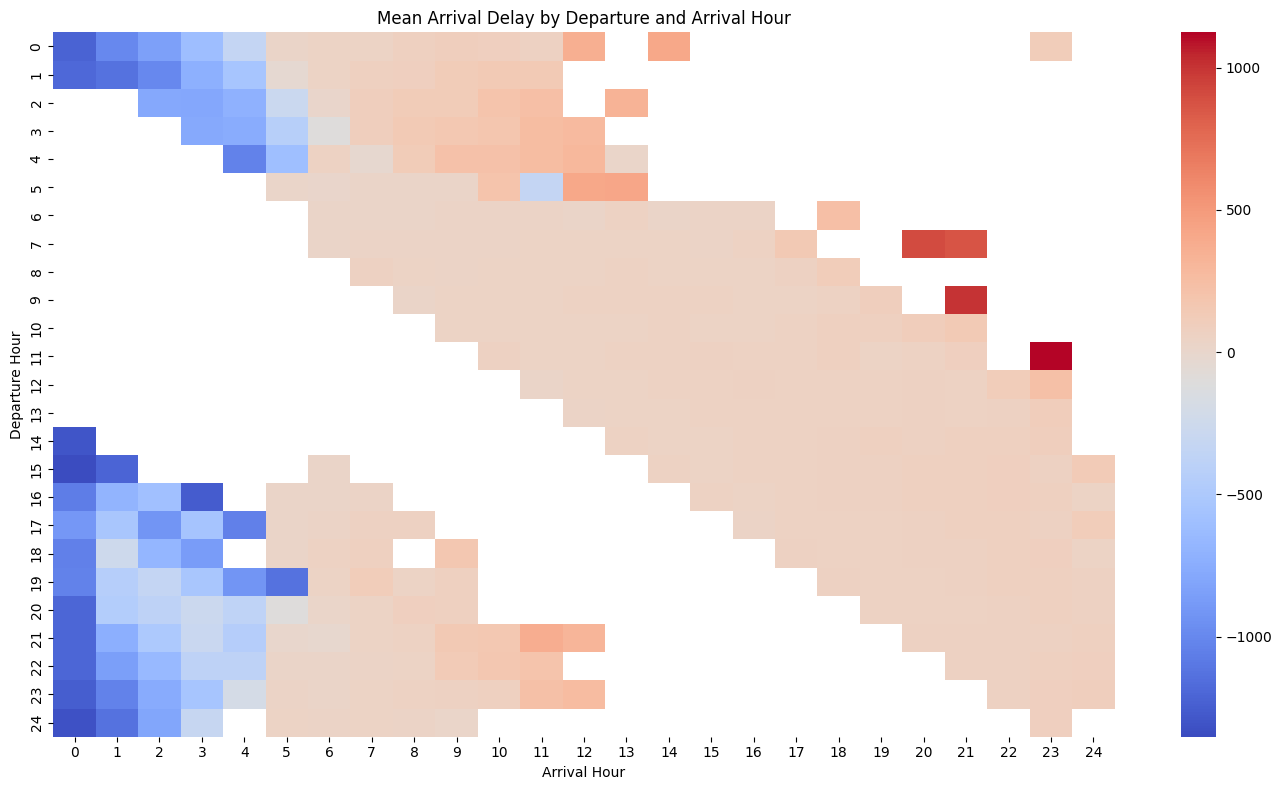

In [0]:
# Visualize average arrival delay by departure and arrival hour

# Group by departure hour and calculate mean arrival delay
dep_hour_delay = df.groupby('DepHour')['ArrivalDelay'].mean().reset_index()
dep_hour_delay.columns = ['DepHour', 'MeanArrivalDelay']

plt.figure(figsize=(12,6))
sns.barplot(data=dep_hour_delay, x='DepHour', y='MeanArrivalDelay', palette='viridis')
plt.title('Mean Arrival Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Group by arrival hour and calculate mean arrival delay
arr_hour_delay = df.groupby('ArrHour')['ArrivalDelay'].mean().reset_index()
arr_hour_delay.columns = ['ArrHour', 'MeanArrivalDelay']

plt.figure(figsize=(12,6))
sns.barplot(data=arr_hour_delay, x='ArrHour', y='MeanArrivalDelay', palette='mako')
plt.title('Mean Arrival Delay by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Optional: Heatmap of mean arrival delay by departure and arrival hour
hourly_delay = df.groupby(['DepHour', 'ArrHour'])['ArrivalDelay'].mean().unstack()
plt.figure(figsize=(14,8))
sns.heatmap(hourly_delay, cmap='coolwarm', annot=False)
plt.title('Mean Arrival Delay by Departure and Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Departure Hour')
plt.tight_layout()
plt.show()

/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614328-3431965656:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


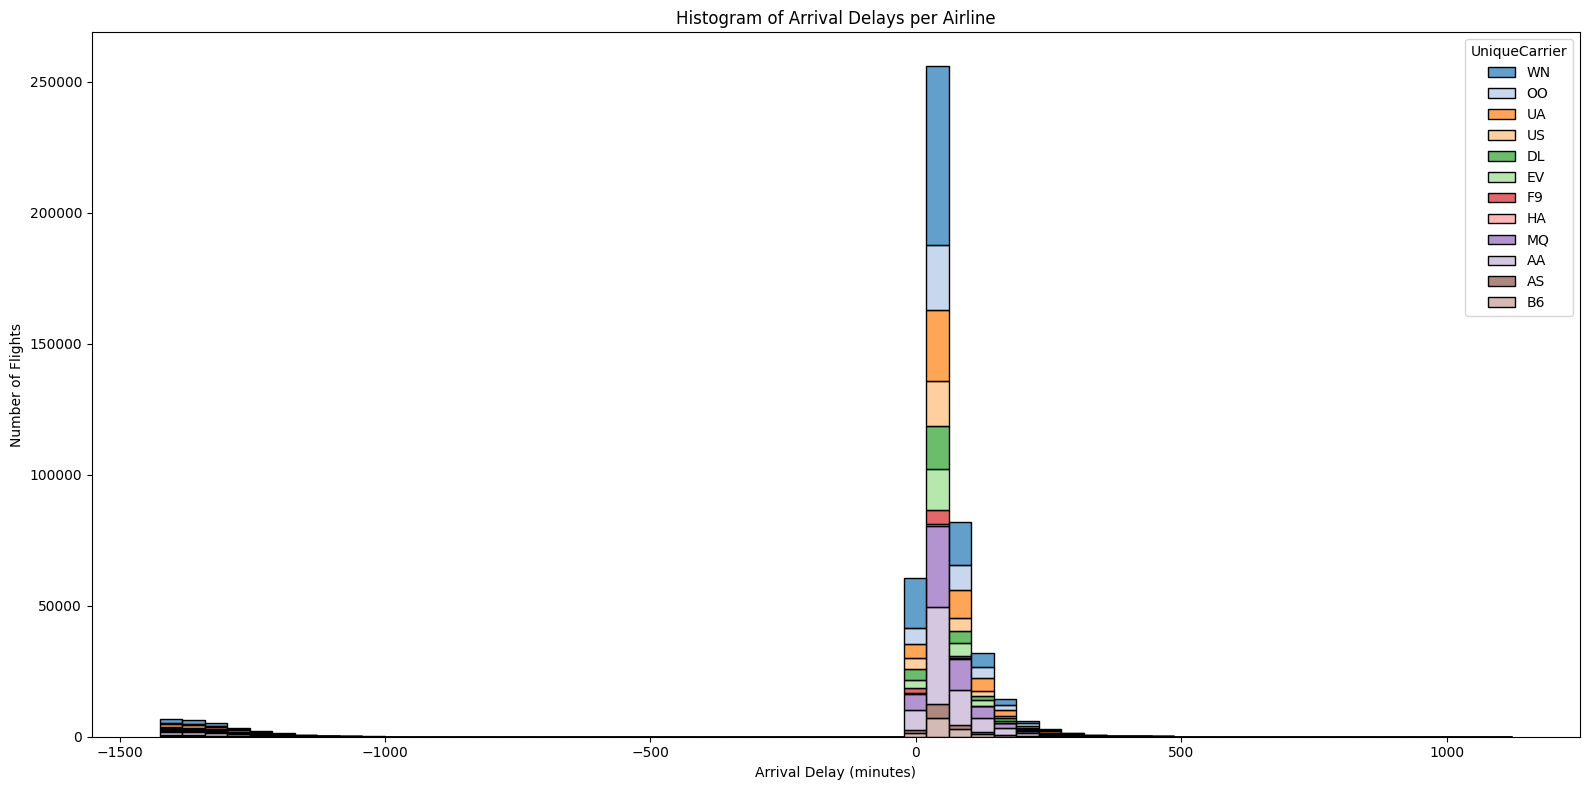

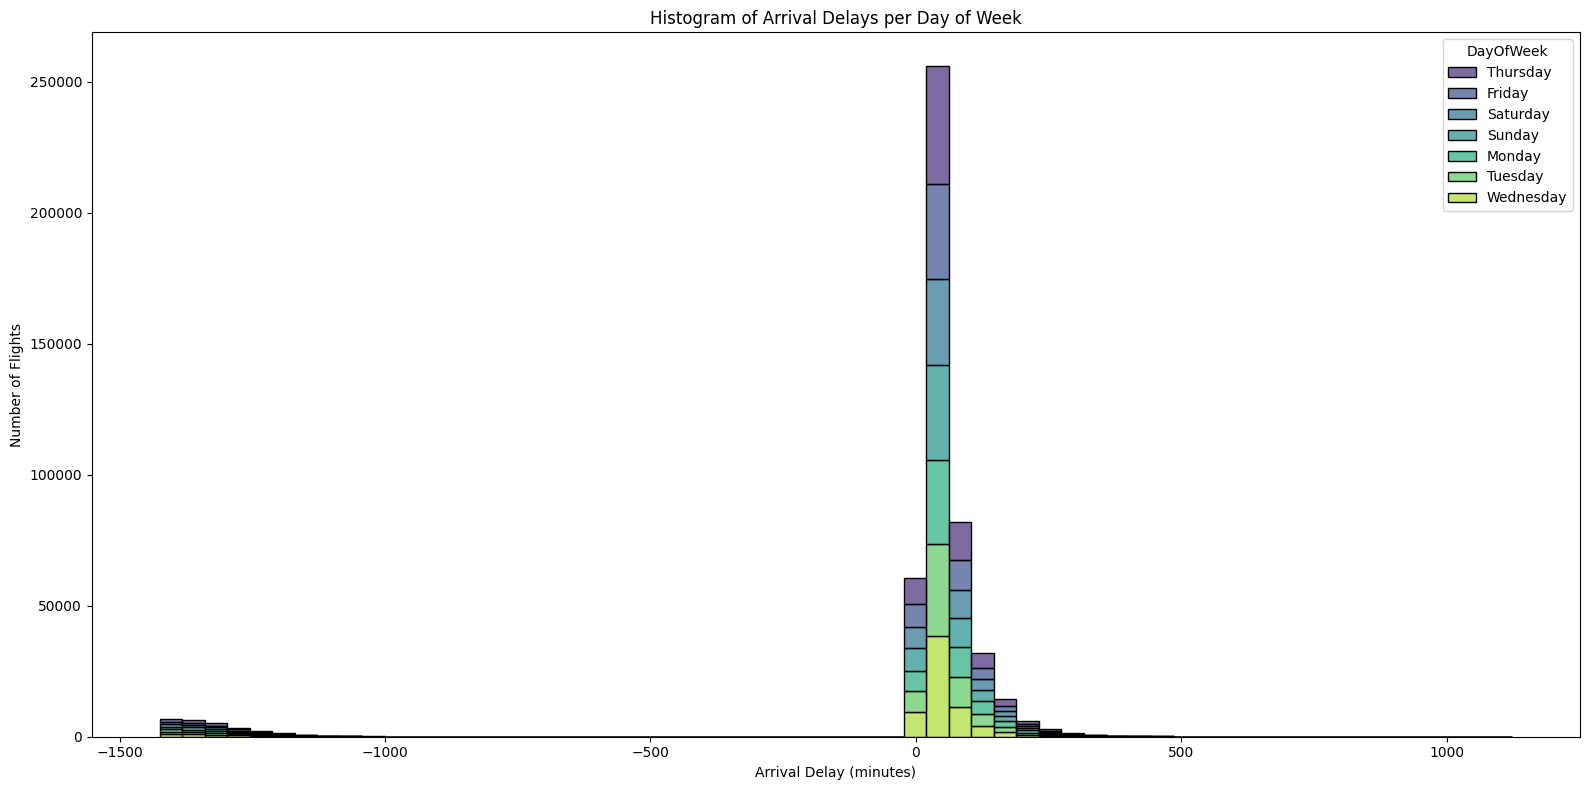

/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614328-3431965656:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


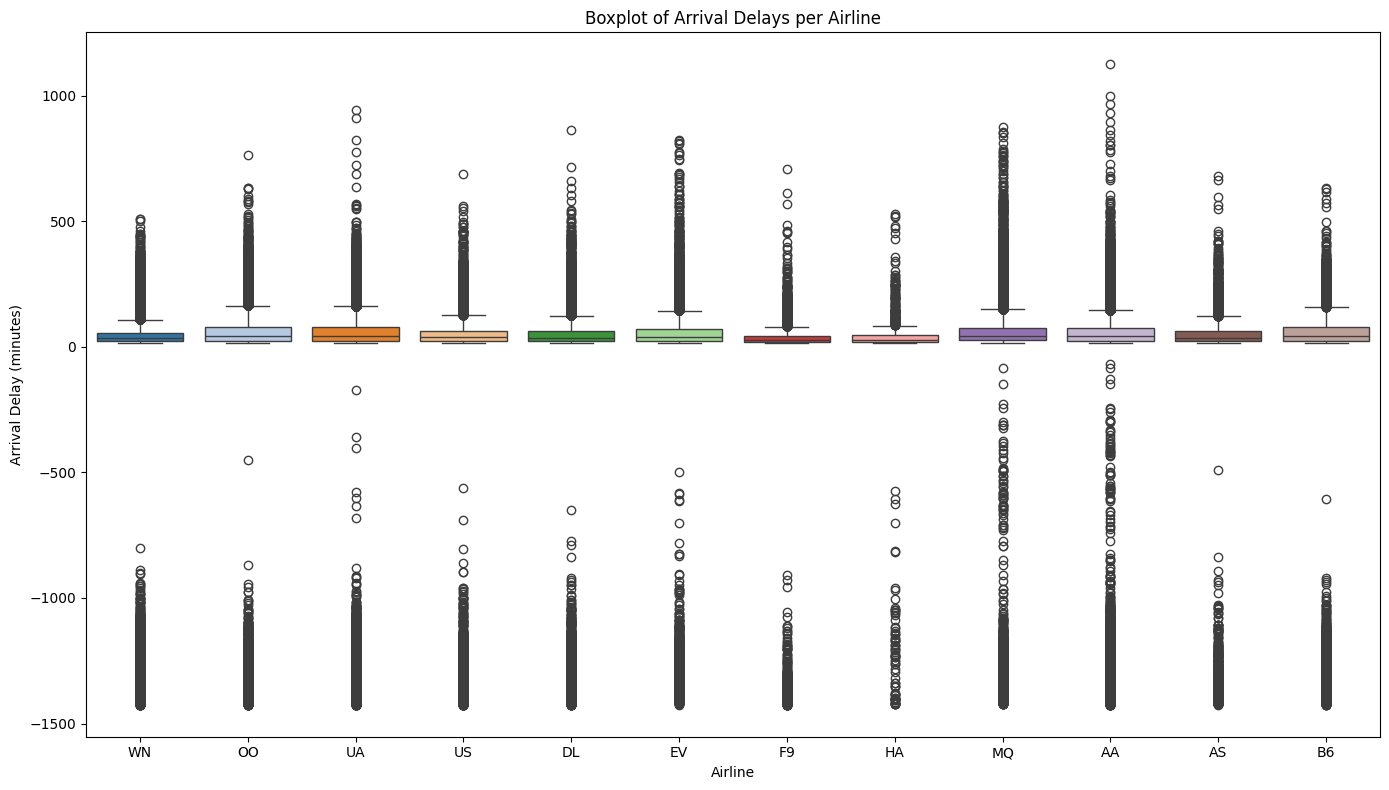

/home/spark-8abc9427-6ced-4e6f-9250-9e/.ipykernel/2609/command-4581891372614328-3431965656:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


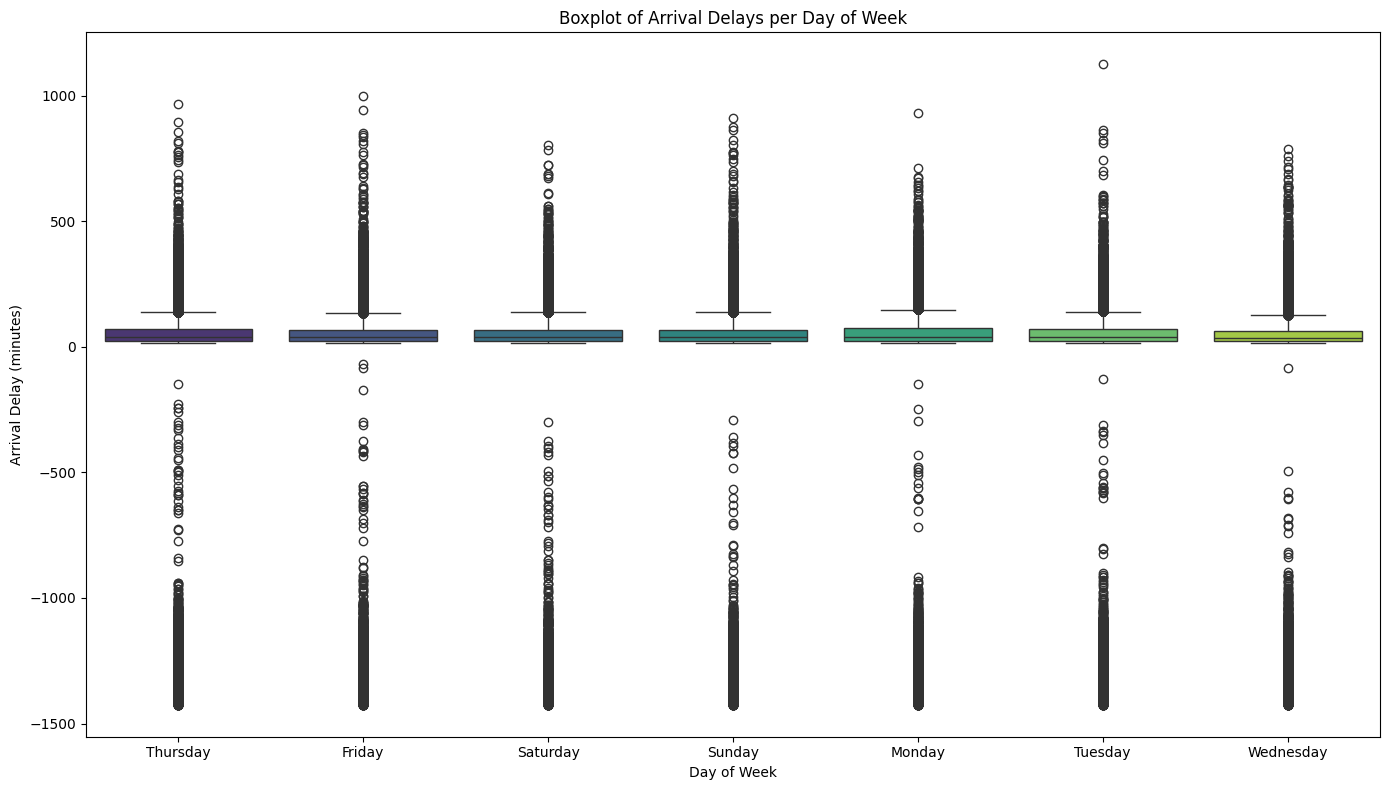

Airline,MeanArrivalDelay
AA,-39.43238470699355
AS,-25.6744
B6,-104.27199947930227
DL,-22.285340833884845
EV,16.16137805983681
F9,-83.09783693843595
HA,-19.341666666666665
MQ,21.02669596919827
OO,6.769113210543029
UA,-40.62754850956131


DayOfWeek,MeanArrivalDelay
Friday,-7.20010928477545
Monday,-21.431477734381126
Saturday,-18.524317489138188
Sunday,-19.592220388250244
Thursday,-28.50034335463296
Tuesday,-21.514371868342884
Wednesday,-22.960761742343493


In [0]:
# Histogram of arrival delays per airline/day
plt.figure(figsize=(16,8))
sns.histplot(
    data=df,
    x='ArrivalDelay',
    hue='UniqueCarrier',
    multiple='stack',
    bins=60,
    palette='tab20',
    alpha=0.7
)
plt.title('Histogram of Arrival Delays per Airline')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8))
sns.histplot(
    data=df,
    x='ArrivalDelay',
    hue='DayOfWeek',
    multiple='stack',
    bins=60,
    palette='viridis',
    alpha=0.7
)
plt.title('Histogram of Arrival Delays per Day of Week')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Boxplot of arrival delays per airline/day
plt.figure(figsize=(14,8))
sns.boxplot(
    data=df,
    x='UniqueCarrier',
    y='ArrivalDelay',
    palette='tab20'
)
plt.title('Boxplot of Arrival Delays per Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
sns.boxplot(
    data=df,
    x='DayOfWeek',
    y='ArrivalDelay',
    palette='viridis'
)
plt.title('Boxplot of Arrival Delays per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Mean delay per airline/day
mean_delay_airline = df.groupby('UniqueCarrier')['ArrivalDelay'].mean().reset_index()
mean_delay_airline.columns = ['Airline', 'MeanArrivalDelay']
display(mean_delay_airline)

mean_delay_day = df.groupby('DayOfWeek')['ArrivalDelay'].mean().reset_index()
mean_delay_day.columns = ['DayOfWeek', 'MeanArrivalDelay']
display(mean_delay_day)